BohaoCui(1009314467)
https://drive.google.com/file/d/1CbqHgjq6fVzjdsiysaGYzLV4yhrddmXY/view?usp=sharing

#INF 1340_Midterm


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#get the table by the table name
def get_table(table_name, skip_rows):
    return pd.read_excel('/content/drive/My Drive/INF1340_Midterm/UN_MigrantStockTotal_2015.xlsx',sheet_name=table_name,skiprows=skip_rows, na_values = '..')

In [4]:
#get the table based the index and rename
def split_table(table, index, col_name):
    temp = table.iloc[:,1:index]
    temp.columns = col_name
    return temp

In [5]:
#unpivot a DataFrame from wide to long format 
def melt_func(table, ID_Vars,Var_Name,Value_Name):
      return table.melt(id_vars=ID_Vars, var_name=Var_Name, value_name=Value_Name)    

In [6]:
#insert column into table
def merge_func(table1,table2,table3,name1,name2):
    table = table1
    table[name1] = table2[name1]
    table[name2] = table3[name2]
    return table

In [7]:
#Select entire row by value, re colname and reset index
def select_row(table,col_name,row_name):
    temp = table[table[col_name].isin(row_name)]
    if row_name[1] == country[1]:
        temp = temp.rename(columns={'Major area, region, country or area of destination':'Country or area of destination'})
    elif row_name[1] == major_area[1]:
        temp = temp.rename(columns={'Major area, region, country or area of destination':'Major area'})
    elif row_name[1] == region[1]:
        temp = temp.rename(columns={'Major area, region, country or area of destination':'Region'})
    temp = reset_index(temp)
    return temp

In [8]:
#Name the index starting with number 1
def reset_index(table):
    table = table.reset_index()
    table.index = table.index+1
    table = table.drop(columns=['index'])
    return table

In [9]:
#creat a table to save the gender data
def creat_gender_table(table,name1,name2,name3,ID_Vars,var_name,value_name):
    Gender_table = table
    both_sexes_table = table
    Gender_table = Gender_table.rename(columns={name1:'male'})
    Gender_table = Gender_table.rename(columns={name2:'female'})
    Gender_table = Gender_table.drop(columns=[name3])
    Gender_table = melt_func(Gender_table,ID_Vars,var_name,value_name)
    Gender_table = reset_index(Gender_table)
   
    #Delete a row based on missing values in a column
    Gender_table = Gender_table.dropna(subset=[value_name])
    return Gender_table

In [10]:
#creat a table to save the both sexes data
def creat_both_sexes_table(table,name1,name2):
    temp = table
    temp = temp.drop(columns=[name1,name2])
    
    #Delete a row based on missing values in a column
    col_name = temp.columns[temp.columns.size-1]
    temp = temp.dropna(subset=[col_name])
    return temp

In [11]:
table_annex = get_table('ANNEX', 14)
#get the coutry or area name
country = table_annex['Country or area'] 
#get the major area name
major_area = table_annex['Major area']
major_area.drop_duplicates(keep='first',inplace=True)
#get the region name
region = table_annex['Region']
region.drop_duplicates(keep='first',inplace=True)

In [12]:
#read xlsx file, set the empty value with 'NAN' 
table1 = get_table('Table 1', 15)
name1 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)','1990','1995','2000','2005','2010','2015']
id_vars1 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)']
var_name = 'Year'

#call funtion to split table and rename the column  
table1_both_sexes = split_table(table1,11,name1)
#call function to unpivot a DataFrame from wide to long format 
table1_both_sexes = melt_func(table1_both_sexes,id_vars1,var_name,'International migrant stock at mid-year (both sexes)') 
table1_both_sexes.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes)
0,WORLD,NaN,900,NaN,1990,152563212.0
1,Developed regions,(b),901,NaN,1990,82378628.0
2,Developing regions,(c),902,NaN,1990,70184584.0
3,Least developed countries,(d),941,NaN,1990,11075966.0
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,59105261.0


In [13]:
#Split table by column, get the male data
table1_male = table1.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
#name the column
table1_male.columns = name1
#unpivot a DataFrame from wide to long format
table1_male = melt_func(table1_male,id_vars1,var_name,'International migrant stock at mid-year (male)')
table1_male.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (male)
0,WORLD,NaN,900,NaN,1990,77747510.0
1,Developed regions,(b),901,NaN,1990,40263397.0
2,Developing regions,(c),902,NaN,1990,37484113.0
3,Least developed countries,(d),941,NaN,1990,5843107.0
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,31641006.0


In [14]:
#Split table by column, get the female data
table1_female = table1.iloc[:,[1,2,3,4,17,18,19,20,21,22]]
#name the column
table1_female.columns =  name1
#unpivot a DataFrame from wide to long format
table1_female = melt_func(table1_female,id_vars1,var_name,'International migrant stock at mid-year (female)')
table1_female.head()


,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (female)
0,WORLD,NaN,900,NaN,1990,74815702.0
1,Developed regions,(b),901,NaN,1990,42115231.0
2,Developing regions,(c),902,NaN,1990,32700471.0
3,Least developed countries,(d),941,NaN,1990,5236216.0
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,27464255.0


In [15]:
#call funtion to merge table
new_table1 = merge_func(table1_both_sexes,table1_male,table1_female,'International migrant stock at mid-year (male)','International migrant stock at mid-year (female)')
new_table1.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes),International migrant stock at mid-year (male),International migrant stock at mid-year (female)
0,WORLD,NaN,900,NaN,1990,152563212.0,77747510.0,74815702.0
1,Developed regions,(b),901,NaN,1990,82378628.0,40263397.0,42115231.0
2,Developing regions,(c),902,NaN,1990,70184584.0,37484113.0,32700471.0
3,Least developed countries,(d),941,NaN,1990,11075966.0,5843107.0,5236216.0
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,59105261.0,31641006.0,27464255.0


In [16]:
col_name = 'Major area, region, country or area of destination'
#Create new table based on country name
table1_country = select_row(new_table1,col_name,country)
table1_country.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes),International migrant stock at mid-year (male),International migrant stock at mid-year (female)
1,Burundi,NaN,108,B R,1990,333110.0,163267.0,169843.0
2,Comoros,NaN,174,B,1990,14079.0,6717.0,7362.0
3,Djibouti,NaN,262,B R,1990,122221.0,64242.0,57979.0
4,Eritrea,NaN,232,I,1990,11848.0,6228.0,5620.0
5,Ethiopia,NaN,231,B R,1990,1155390.0,607284.0,548106.0


In [17]:
name1 = 'International migrant stock at mid-year (male)'
name2 = 'International migrant stock at mid-year (female)'
name3 = 'International migrant stock at mid-year (both sexes)'
value_name_gender = 'International migrant stock at mid-year'
id_vars_country = ['Country or area of destination','Notes','Country code','Type of data(a)','Year']
#Split table to melt male and female into gender
table1_country_gender = creat_gender_table(table1_country,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table1_country_gender.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Gender,International migrant stock at mid-year
1,Burundi,NaN,108,B R,1990,male,163267.0
2,Comoros,NaN,174,B,1990,male,6717.0
3,Djibouti,NaN,262,B R,1990,male,64242.0
4,Eritrea,NaN,232,I,1990,male,6228.0
5,Ethiopia,NaN,231,B R,1990,male,607284.0


In [18]:
#split table to get the both sexes data 
table1_country_bothSexes = creat_both_sexes_table(table1_country,name1,name2)
table1_country_bothSexes.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes)
1,Burundi,NaN,108,B R,1990,333110.0
2,Comoros,NaN,174,B,1990,14079.0
3,Djibouti,NaN,262,B R,1990,122221.0
4,Eritrea,NaN,232,I,1990,11848.0
5,Ethiopia,NaN,231,B R,1990,1155390.0


In [19]:
#Create new table based on major area name
table1_major = select_row(new_table1,col_name,major_area)
table1_major.head() 

,Major area,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes),International migrant stock at mid-year (male),International migrant stock at mid-year (female)
1,Africa,NaN,903,NaN,1990,15690623.0,8279564.0,7411059.0
2,Asia,NaN,935,NaN,1990,48142261.0,26011875.0,22130386.0
3,Europe,NaN,908,NaN,1990,49219200.0,23946673.0,25272527.0
4,Latin America and the Caribbean,NaN,904,NaN,1990,7169728.0,3597037.0,3572691.0
5,Northern America,NaN,905,NaN,1990,27610542.0,13497319.0,14113223.0


In [20]:
#Split table to melt male and female into gender
id_vars_major = ['Major area','Notes','Country code','Type of data(a)','Year']
table1_major_gender = creat_gender_table(table1_major,name1,name2,name3,id_vars_major,'Gender',value_name_gender)
table1_major_gender.head()

,Major area,Notes,Country code,Type of data(a),Year,Gender,International migrant stock at mid-year
1,Africa,NaN,903,NaN,1990,male,8279564.0
2,Asia,NaN,935,NaN,1990,male,26011875.0
3,Europe,NaN,908,NaN,1990,male,23946673.0
4,Latin America and the Caribbean,NaN,904,NaN,1990,male,3597037.0
5,Northern America,NaN,905,NaN,1990,male,13497319.0


In [21]:
#split table to get the both sexes data 
table1_major_bothSexes = creat_both_sexes_table(table1_major,name1,name2)
table1_major_bothSexes.head()

,Major area,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes)
1,Africa,NaN,903,NaN,1990,15690623.0
2,Asia,NaN,935,NaN,1990,48142261.0
3,Europe,NaN,908,NaN,1990,49219200.0
4,Latin America and the Caribbean,NaN,904,NaN,1990,7169728.0
5,Northern America,NaN,905,NaN,1990,27610542.0


In [22]:
#Create new table based on region name
table1_region = select_row(new_table1,col_name,region)
table1_region.head() 

,Region,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes),International migrant stock at mid-year (male),International migrant stock at mid-year (female)
1,Eastern Africa,NaN,910,NaN,1990,5964031.0,3071189.0,2892842.0
2,Middle Africa,NaN,911,NaN,1990,1460530.0,744494.0,716036.0
3,Northern Africa,NaN,912,NaN,1990,2403200.0,1230643.0,1172557.0
4,Southern Africa,NaN,913,NaN,1990,1392359.0,840899.0,551460.0
5,Western Africa,NaN,914,NaN,1990,4470503.0,2392339.0,2078164.0


In [23]:
#Split table to melt male and female into gender
id_vars_region = ['Region','Notes','Country code','Type of data(a)','Year']
table1_region_gender = creat_gender_table(table1_region,name1,name2,name3,id_vars_region,'Gender',value_name_gender)
table1_region_gender.head()

,Region,Notes,Country code,Type of data(a),Year,Gender,International migrant stock at mid-year
1,Eastern Africa,NaN,910,NaN,1990,male,3071189.0
2,Middle Africa,NaN,911,NaN,1990,male,744494.0
3,Northern Africa,NaN,912,NaN,1990,male,1230643.0
4,Southern Africa,NaN,913,NaN,1990,male,840899.0
5,Western Africa,NaN,914,NaN,1990,male,2392339.0


In [24]:
#split table to get the both sexes data 
table1_region_bothSexes = creat_both_sexes_table(table1_region,name1,name2)
table1_region_bothSexes.head()

,Region,Notes,Country code,Type of data(a),Year,International migrant stock at mid-year (both sexes)
1,Eastern Africa,NaN,910,NaN,1990,5964031.0
2,Middle Africa,NaN,911,NaN,1990,1460530.0
3,Northern Africa,NaN,912,NaN,1990,2403200.0
4,Southern Africa,NaN,913,NaN,1990,1392359.0
5,Western Africa,NaN,914,NaN,1990,4470503.0


In [25]:
#read Table 2 file
table2=get_table('Table 2', 15)
name2 = ['Major area, region, country or area of destination','Notes','Country code','1990','1995','2000','2005','2010','2015']
id_vars2 = ['Major area, region, country or area of destination','Notes','Country code']

#call funtion to split table and rename the column  
table2_both_sexes = split_table(table2,10,name2)
#call function to unpivot a DataFrame from wide to long format 
table2_both_sexes = melt_func(table2_both_sexes,id_vars2,var_name,'Total population of both sexes at mid-year (thousands)') 
table2_both_sexes.head()

,"Major area, region, country or area of destination",Notes,Country code,Year,Total population of both sexes at mid-year (thousands)
0,WORLD,NaN,900,1990,5309667.699
1,Developed regions,(b),901,1990,1144463.062
2,Developing regions,(c),902,1990,4165204.637
3,Least developed countries,(d),941,1990,510057.629
4,Less developed regions excluding least develop...,NaN,934,1990,3655147.008


In [26]:
#Split table by column, get the male data
table2_male = table2.iloc[:,[1,2,3,10,11,12,13,14,15]]
table2_male.columns = name2
#unpivot a DataFrame from wide to long format
table2_male = melt_func(table2_male,id_vars2,var_name,'Total male population at mid-year (thousands)') 
table2_male.head()

,"Major area, region, country or area of destination",Notes,Country code,Year,Total male population at mid-year (thousands)
0,WORLD,NaN,900,1990,2670423.701
1,Developed regions,(b),901,1990,555255.626
2,Developing regions,(c),902,1990,2115168.075
3,Least developed countries,(d),941,1990,254042.556
4,Less developed regions excluding least develop...,NaN,934,1990,1861125.519


In [27]:
#Split table by column, get the female data
table2_female = table2.iloc[:,[1,2,3,16,17,18,19,20,21]]
table2_female.columns = name2
#unpivot a DataFrame from wide to long format
table2_female = melt_func(table2_female,id_vars2,var_name,'Total female population at mid-year (thousands)') 
table2_female.head()



,"Major area, region, country or area of destination",Notes,Country code,Year,Total female population at mid-year (thousands)
0,WORLD,NaN,900,1990,2639243.998
1,Developed regions,(b),901,1990,589207.436
2,Developing regions,(c),902,1990,2050036.562
3,Least developed countries,(d),941,1990,256015.073
4,Less developed regions excluding least develop...,NaN,934,1990,1794021.489


In [28]:
new_table2 = merge_func(table2_both_sexes,table2_male,table2_female,'Total male population at mid-year (thousands)','Total female population at mid-year (thousands)')
new_table2.head()

,"Major area, region, country or area of destination",Notes,Country code,Year,Total population of both sexes at mid-year (thousands),Total male population at mid-year (thousands),Total female population at mid-year (thousands)
0,WORLD,NaN,900,1990,5309667.699,2670423.701,2639243.998
1,Developed regions,(b),901,1990,1144463.062,555255.626,589207.436
2,Developing regions,(c),902,1990,4165204.637,2115168.075,2050036.562
3,Least developed countries,(d),941,1990,510057.629,254042.556,256015.073
4,Less developed regions excluding least develop...,NaN,934,1990,3655147.008,1861125.519,1794021.489


In [29]:
#Create new table based on country name
table2_country = select_row(new_table2,col_name,country)
table2_country.head()

,Country or area of destination,Notes,Country code,Year,Total population of both sexes at mid-year (thousands),Total male population at mid-year (thousands),Total female population at mid-year (thousands)
1,Burundi,NaN,108,1990,5613.141,2755.028,2858.113
2,Comoros,NaN,174,1990,415.144,208.212,206.932
3,Djibouti,NaN,262,1990,588.356,295.933,292.423
4,Eritrea,NaN,232,1990,3139.083,1558.486,1580.597
5,Ethiopia,NaN,231,1990,48057.094,23965.647,24091.447


In [30]:
name1 = 'Total male population at mid-year (thousands)'
name2 = 'Total female population at mid-year (thousands)'
name3 = 'Total population of both sexes at mid-year (thousands)'
value_name_gender = 'Total population at mid-year'
id_vars_country = ['Country or area of destination','Notes','Country code','Year']

#Split table to melt male and female into gender
table2_country_gender = creat_gender_table(table2_country,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table2_country_gender.head()

,Country or area of destination,Notes,Country code,Year,Gender,Total population at mid-year
1,Burundi,NaN,108,1990,male,2755.028
2,Comoros,NaN,174,1990,male,208.212
3,Djibouti,NaN,262,1990,male,295.933
4,Eritrea,NaN,232,1990,male,1558.486
5,Ethiopia,NaN,231,1990,male,23965.647


In [31]:
#split table to get the both sexes data 
table2_country_bothSexes = creat_both_sexes_table(table2_country,name1,name2)
table2_country_bothSexes.head()

,Country or area of destination,Notes,Country code,Year,Total population of both sexes at mid-year (thousands)
1,Burundi,NaN,108,1990,5613.141
2,Comoros,NaN,174,1990,415.144
3,Djibouti,NaN,262,1990,588.356
4,Eritrea,NaN,232,1990,3139.083
5,Ethiopia,NaN,231,1990,48057.094


In [32]:
#Create new table based on major area name
table2_major = select_row(new_table2,col_name,major_area)
table2_major.head() 

,Major area,Notes,Country code,Year,Total population of both sexes at mid-year (thousands),Total male population at mid-year (thousands),Total female population at mid-year (thousands)
1,Africa,NaN,903,1990,631614.304,315071.378,316542.926
2,Asia,NaN,935,1990,3202474.692,1634734.677,1567740.015
3,Europe,NaN,908,1990,721086.311,347356.281,373730.030
4,Latin America and the Caribbean,NaN,904,1990,446888.767,221989.776,224898.991
5,Northern America,NaN,905,1990,280633.063,137757.875,142875.188


In [33]:
#Split table to melt male and female into gender
id_vars_country = ['Major area','Notes','Country code','Year']
table2_major_gender = creat_gender_table(table2_major,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table2_major_gender.head()

,Major area,Notes,Country code,Year,Gender,Total population at mid-year
1,Africa,NaN,903,1990,male,315071.378
2,Asia,NaN,935,1990,male,1634734.677
3,Europe,NaN,908,1990,male,347356.281
4,Latin America and the Caribbean,NaN,904,1990,male,221989.776
5,Northern America,NaN,905,1990,male,137757.875


In [34]:
#split table to get the both sexes data 
table2_major_bothSexes = creat_both_sexes_table(table2_major,name1,name2)
table2_major_bothSexes.head()

,Major area,Notes,Country code,Year,Total population of both sexes at mid-year (thousands)
1,Africa,NaN,903,1990,631614.304
2,Asia,NaN,935,1990,3202474.692
3,Europe,NaN,908,1990,721086.311
4,Latin America and the Caribbean,NaN,904,1990,446888.767
5,Northern America,NaN,905,1990,280633.063


In [35]:
#Create new table based on region name
table2_region = select_row(new_table2,col_name,region)
table2_region.head() 

,Region,Notes,Country code,Year,Total population of both sexes at mid-year (thousands),Total male population at mid-year (thousands),Total female population at mid-year (thousands)
1,Eastern Africa,NaN,910,1990,198231.687,98208.646,100023.041
2,Middle Africa,NaN,911,1990,70886.433,35035.128,35851.305
3,Northern Africa,NaN,912,1990,140116.613,70480.841,69635.772
4,Southern Africa,NaN,913,1990,42049.013,20760.400,21288.613
5,Western Africa,NaN,914,1990,180330.558,90586.363,89744.195


In [36]:
#Split table to melt male and female into gender
id_vars_region = ['Region','Notes','Country code','Year']
table2_region_gender = creat_gender_table(table2_region,name1,name2,name3,id_vars_region,'Gender',value_name_gender)
table2_region_gender.head()

,Region,Notes,Country code,Year,Gender,Total population at mid-year
1,Eastern Africa,NaN,910,1990,male,98208.646
2,Middle Africa,NaN,911,1990,male,35035.128
3,Northern Africa,NaN,912,1990,male,70480.841
4,Southern Africa,NaN,913,1990,male,20760.400
5,Western Africa,NaN,914,1990,male,90586.363


In [37]:
#split table to get the both sexes data 
table2_region_bothSexes = creat_both_sexes_table(table2_region,name1,name2)
table2_region_bothSexes.head()

,Region,Notes,Country code,Year,Total population of both sexes at mid-year (thousands)
1,Eastern Africa,NaN,910,1990,198231.687
2,Middle Africa,NaN,911,1990,70886.433
3,Northern Africa,NaN,912,1990,140116.613
4,Southern Africa,NaN,913,1990,42049.013
5,Western Africa,NaN,914,1990,180330.558


In [38]:
#read table3 file
table3=get_table('Table 3', 15)
name3 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)','1990','1995','2000','2005','2010','2015']
id_vars3 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)']

#call funtion to split table and rename the column  
table3_both_sexes = split_table(table3,11,name3)
#call function to unpivot a DataFrame from wide to long format 
table3_both_sexes = melt_func(table3_both_sexes,id_vars3,var_name,'International migrant stock as a percentage of the total population (both sexes)') 
table3_both_sexes.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes)
0,WORLD,NaN,900,NaN,1990,2.873310
1,Developed regions,(b),901,NaN,1990,7.198015
2,Developing regions,(c),902,NaN,1990,1.685021
3,Least developed countries,(d),941,NaN,1990,2.171513
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,1.617042


In [39]:
#Split table by column, get the male data
table3_male=table3.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
#rename the column
table3_male.columns=name3
#call function to unpivot a DataFrame from wide to long format and reset new index
table3_male = melt_func(table3_male,id_vars3,var_name,'International migrant stock as a percentage of the total population (male)') 
table3_male.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (male)
0,WORLD,NaN,900,NaN,1990,2.911430
1,Developed regions,(b),901,NaN,1990,7.251326
2,Developing regions,(c),902,NaN,1990,1.772158
3,Least developed countries,(d),941,NaN,1990,2.300050
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,1.700101


In [40]:
#Split table by column, get the female data
table3_female=table3.iloc[:,[1,2,3,4,17,18,19,20,21,22]]
#rename the column
table3_female.columns=name3
#call function to unpivot a DataFrame from wide to long format 
table3_female = melt_func(table3_female,id_vars3,var_name,'International migrant stock as a percentage of the total population (female)') 
table3_female.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (female)
0,WORLD,NaN,900,NaN,1990,2.834740
1,Developed regions,(b),901,NaN,1990,7.147777
2,Developing regions,(c),902,NaN,1990,1.595116
3,Least developed countries,(d),941,NaN,1990,2.045276
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,1.530877


In [41]:
new_table3 = merge_func(table3_both_sexes,table3_male,table3_female,'International migrant stock as a percentage of the total population (male)','International migrant stock as a percentage of the total population (female)')
new_table3.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes),International migrant stock as a percentage of the total population (male),International migrant stock as a percentage of the total population (female)
0,WORLD,NaN,900,NaN,1990,2.873310,2.911430,2.834740
1,Developed regions,(b),901,NaN,1990,7.198015,7.251326,7.147777
2,Developing regions,(c),902,NaN,1990,1.685021,1.772158,1.595116
3,Least developed countries,(d),941,NaN,1990,2.171513,2.300050,2.045276
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,1.617042,1.700101,1.530877


In [42]:
#Create new table based on country name
table3_country = select_row(new_table3,col_name,country)
table3_country.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes),International migrant stock as a percentage of the total population (male),International migrant stock as a percentage of the total population (female)
1,Burundi,NaN,108,B R,1990,5.934467,5.926147,5.942487
2,Comoros,NaN,174,B,1990,3.391353,3.226039,3.557690
3,Djibouti,NaN,262,B R,1990,20.773307,21.708292,19.827100
4,Eritrea,NaN,232,I,1990,0.377435,0.399619,0.355562
5,Ethiopia,NaN,231,B R,1990,2.404203,2.533977,2.275106


In [43]:
name1 = 'International migrant stock as a percentage of the total population (male)'
name2 = 'International migrant stock as a percentage of the total population (female)'
name3 = 'International migrant stock as a percentage of the total population (both sexes)'
value_name_gender = 'International migrant stock as a percentage of the total population'
id_vars_country = ['Country or area of destination','Notes','Country code','Type of data(a)','Year']

#Split table to melt male and female into gender
table3_country_gender = creat_gender_table(table3_country,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table3_country_gender.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Gender,International migrant stock as a percentage of the total population
1,Burundi,NaN,108,B R,1990,male,5.926147
2,Comoros,NaN,174,B,1990,male,3.226039
3,Djibouti,NaN,262,B R,1990,male,21.708292
4,Eritrea,NaN,232,I,1990,male,0.399619
5,Ethiopia,NaN,231,B R,1990,male,2.533977


In [44]:
#split table to get the both sexes data 
table3_country_bothSexes = creat_both_sexes_table(table3_country,name1,name2)
table3_country_bothSexes.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes)
1,Burundi,NaN,108,B R,1990,5.934467
2,Comoros,NaN,174,B,1990,3.391353
3,Djibouti,NaN,262,B R,1990,20.773307
4,Eritrea,NaN,232,I,1990,0.377435
5,Ethiopia,NaN,231,B R,1990,2.404203


In [45]:
#Create new table based on major area name
table3_major = select_row(new_table3,col_name,major_area)
table3_major.head() 

,Major area,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes),International migrant stock as a percentage of the total population (male),International migrant stock as a percentage of the total population (female)
1,Africa,NaN,903,NaN,1990,2.484210,2.627838,2.341249
2,Asia,NaN,935,NaN,1990,1.503283,1.591199,1.411611
3,Europe,NaN,908,NaN,1990,6.825702,6.893980,6.762241
4,Latin America and the Caribbean,NaN,904,NaN,1990,1.604365,1.620362,1.588576
5,Northern America,NaN,905,NaN,1990,9.838663,9.797857,9.878008


In [46]:
id_vars_country = ['Major area','Notes','Country code','Type of data(a)','Year']
#Split table to melt male and female into gender
table3_major_gender = creat_gender_table(table3_major,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table3_major_gender.head()

,Major area,Notes,Country code,Type of data(a),Year,Gender,International migrant stock as a percentage of the total population
1,Africa,NaN,903,NaN,1990,male,2.627838
2,Asia,NaN,935,NaN,1990,male,1.591199
3,Europe,NaN,908,NaN,1990,male,6.893980
4,Latin America and the Caribbean,NaN,904,NaN,1990,male,1.620362
5,Northern America,NaN,905,NaN,1990,male,9.797857


In [47]:
#split table to get the both sexes data 
table3_major_bothSexes = creat_both_sexes_table(table3_major,name1,name2)
table3_major_bothSexes.head()

,Major area,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes)
1,Africa,NaN,903,NaN,1990,2.484210
2,Asia,NaN,935,NaN,1990,1.503283
3,Europe,NaN,908,NaN,1990,6.825702
4,Latin America and the Caribbean,NaN,904,NaN,1990,1.604365
5,Northern America,NaN,905,NaN,1990,9.838663


In [48]:
#Create new table based on region name
table3_region = select_row(new_table3,col_name,region)
table3_region.head() 

,Region,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes),International migrant stock as a percentage of the total population (male),International migrant stock as a percentage of the total population (female)
1,Eastern Africa,NaN,910,NaN,1990,3.008616,3.127208,2.892176
2,Middle Africa,NaN,911,NaN,1990,2.060380,2.124993,1.997238
3,Northern Africa,NaN,912,NaN,1990,1.715143,1.746067,1.683843
4,Southern Africa,NaN,913,NaN,1990,3.311276,4.050495,2.590399
5,Western Africa,NaN,914,NaN,1990,2.479060,2.640948,2.315653


In [49]:
id_vars_country = ['Region','Notes','Country code','Type of data(a)','Year']
#Split table to melt male and female into gender
table3_region_gender = creat_gender_table(table3_region,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table3_region_gender.head()

,Region,Notes,Country code,Type of data(a),Year,Gender,International migrant stock as a percentage of the total population
1,Eastern Africa,NaN,910,NaN,1990,male,3.127208
2,Middle Africa,NaN,911,NaN,1990,male,2.124993
3,Northern Africa,NaN,912,NaN,1990,male,1.746067
4,Southern Africa,NaN,913,NaN,1990,male,4.050495
5,Western Africa,NaN,914,NaN,1990,male,2.640948


In [50]:
#split table to get the both sexes data 
table3_region_bothSexes = creat_both_sexes_table(table3_region,name1,name2)
table3_region_bothSexes.head()

,Region,Notes,Country code,Type of data(a),Year,International migrant stock as a percentage of the total population (both sexes)
1,Eastern Africa,NaN,910,NaN,1990,3.008616
2,Middle Africa,NaN,911,NaN,1990,2.060380
3,Northern Africa,NaN,912,NaN,1990,1.715143
4,Southern Africa,NaN,913,NaN,1990,3.311276
5,Western Africa,NaN,914,NaN,1990,2.479060


In [51]:
#read table4 file
table4=get_table('Table 4', 15)
name4=['Major area, region, country or area of destination','Notes','Country code','Type of data(a)','1990','1995','2000','2005','2010','2015']
id_vars4=['Major area, region, country or area of destination','Notes','Country code','Type of data(a)']
table4=table4.iloc[:,1:]
table4.columns=name4
#call function to unpivot a DataFrame from wide to long format 
table4 = melt_func(table4,id_vars4,var_name,'Female migrants as a percentage of the international migrant stock') 
table4.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Female migrants as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,49.039150
1,Developed regions,(b),901,NaN,1990,51.123977
2,Developing regions,(c),902,NaN,1990,46.592099
3,Least developed countries,(d),941,NaN,1990,47.261155
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,46.466684


In [52]:
#Create new table based on country name
table4_country = select_row(table4,col_name,country)
table4_country.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Female migrants as a percentage of the international migrant stock
1,Burundi,NaN,108,B R,1990,50.987061
2,Comoros,NaN,174,B,1990,52.290646
3,Djibouti,NaN,262,B R,1990,47.437838
4,Eritrea,NaN,232,I,1990,47.434166
5,Ethiopia,NaN,231,B R,1990,47.439047


In [53]:
#Create new table based on major area name
table4_major = select_row(table4,col_name,major_area)
table4_major.head() 

,Major area,Notes,Country code,Type of data(a),Year,Female migrants as a percentage of the international migrant stock
1,Africa,NaN,903,NaN,1990,47.232408
2,Asia,NaN,935,NaN,1990,45.968730
3,Europe,NaN,908,NaN,1990,51.346887
4,Latin America and the Caribbean,NaN,904,NaN,1990,49.830217
5,Northern America,NaN,905,NaN,1990,51.115342


In [54]:
#Create new table based on region name
table4_region = select_row(table4,col_name,region)
table4_region.head() 

,Region,Notes,Country code,Type of data(a),Year,Female migrants as a percentage of the international migrant stock
1,Eastern Africa,NaN,910,NaN,1990,48.504812
2,Middle Africa,NaN,911,NaN,1990,49.025765
3,Northern Africa,NaN,912,NaN,1990,48.791486
4,Southern Africa,NaN,913,NaN,1990,39.606165
5,Western Africa,NaN,914,NaN,1990,46.486134


In [55]:
#read table5 file
table5=get_table('Table 5', 15)
name5=['Major area, region, country or area of destination','Notes','Country code','Type of data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
id_vars5=['Major area, region, country or area of destination','Notes','Country code','Type of data(a)']

#call funtion to split table and rename the column  
table5_both_sexes = split_table(table5,10,name5)
#call function to unpivot a DataFrame from wide to long format 
table5_both_sexes = melt_func(table5_both_sexes,id_vars5,var_name,'Annual rate of change of the migrant stock (both sexes)') 
table5_both_sexes.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes)
0,WORLD,NaN,900,NaN,1990-1995,1.051865
1,Developed regions,(b),901,NaN,1990-1995,2.275847
2,Developing regions,(c),902,NaN,1990-1995,-0.487389
3,Least developed countries,(d),941,NaN,1990-1995,1.118175
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-0.803244


In [56]:
#Split table by column, get the male data
table5_male=table5.iloc[:,[1,2,3,4,10,11,12,13,14]]
table5_male.columns=name5
#call function to unpivot a DataFrame from wide to long format and reset new index
table5_male = melt_func(table5_male,id_vars5,var_name,'Annual rate of change of the migrant stock (male)') 
table5_male.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (male)
0,WORLD,NaN,900,NaN,1990-1995,1.000922
1,Developed regions,(b),901,NaN,1990-1995,2.265595
2,Developing regions,(c),902,NaN,1990-1995,-0.452980
3,Least developed countries,(d),941,NaN,1990-1995,1.000073
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-0.733256


In [57]:
#Split table by column, get the female data
table5_female=table5.iloc[:,[1,2,3,4,15,16,17,18,19]]
table5_female.columns=name5
#call function to unpivot a DataFrame from wide to long format and reset new index
table5_female = melt_func(table5_female,id_vars5,var_name,'Annual rate of change of the migrant stock (female)') 
table5_female.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (female)
0,WORLD,NaN,900,NaN,1990-1995,1.104667
1,Developed regions,(b),901,NaN,1990-1995,2.285643
2,Developing regions,(c),902,NaN,1990-1995,-0.526904
3,Least developed countries,(d),941,NaN,1990-1995,1.249146
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-0.884180


In [58]:
new_table5 = merge_func(table5_both_sexes,table5_male,table5_female,'Annual rate of change of the migrant stock (male)','Annual rate of change of the migrant stock (female)')
new_table5.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes),Annual rate of change of the migrant stock (male),Annual rate of change of the migrant stock (female)
0,WORLD,NaN,900,NaN,1990-1995,1.051865,1.000922,1.104667
1,Developed regions,(b),901,NaN,1990-1995,2.275847,2.265595,2.285643
2,Developing regions,(c),902,NaN,1990-1995,-0.487389,-0.452980,-0.526904
3,Least developed countries,(d),941,NaN,1990-1995,1.118175,1.000073,1.249146
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-0.803244,-0.733256,-0.884180


In [59]:
#Create new table based on country name
table5_country = select_row(new_table5,col_name,country)
table5_country.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes),Annual rate of change of the migrant stock (male),Annual rate of change of the migrant stock (female)
1,Burundi,NaN,108,B R,1990-1995,-5.355717,-5.475511,-5.241234
2,Comoros,NaN,174,B,1990-1995,-0.199873,-0.309060,-0.100770
3,Djibouti,NaN,262,B R,1990-1995,-4.058465,-4.046026,-4.072257
4,Eritrea,NaN,232,I,1990-1995,0.910748,0.983754,0.829532
5,Ethiopia,NaN,231,B R,1990-1995,-7.179771,-7.179744,-7.179800


In [60]:
name1 = 'Annual rate of change of the migrant stock (male)'
name2 = 'Annual rate of change of the migrant stock (female)'
name3 = 'Annual rate of change of the migrant stock (both sexes)'
value_name_gender = 'Annual rate of change of the migrant stock'
id_vars_country = ['Country or area of destination','Notes','Country code','Type of data(a)','Year']

#Split table to melt male and female into gender
table5_country_gender = creat_gender_table(table5_country,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table5_country_gender.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Gender,Annual rate of change of the migrant stock
1,Burundi,NaN,108,B R,1990-1995,male,-5.475511
2,Comoros,NaN,174,B,1990-1995,male,-0.309060
3,Djibouti,NaN,262,B R,1990-1995,male,-4.046026
4,Eritrea,NaN,232,I,1990-1995,male,0.983754
5,Ethiopia,NaN,231,B R,1990-1995,male,-7.179744


In [61]:
#split table to get the both sexes data 
table5_country_bothSexes = creat_both_sexes_table(table5_country,name1,name2)
table5_country_bothSexes.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes)
1,Burundi,NaN,108,B R,1990-1995,-5.355717
2,Comoros,NaN,174,B,1990-1995,-0.199873
3,Djibouti,NaN,262,B R,1990-1995,-4.058465
4,Eritrea,NaN,232,I,1990-1995,0.910748
5,Ethiopia,NaN,231,B R,1990-1995,-7.179771


In [62]:
#Create new table based on major area name
table5_major = select_row(new_table5,col_name,major_area)
table5_major.head()

,Major area,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes),Annual rate of change of the migrant stock (male),Annual rate of change of the migrant stock (female)
1,Africa,NaN,903,NaN,1990-1995,0.826734,0.798774,0.857926
2,Asia,NaN,935,NaN,1990-1995,-0.673431,-0.636150,-0.717339
3,Europe,NaN,908,NaN,1990-1995,1.420702,1.363213,1.475022
4,Latin America and the Caribbean,NaN,904,NaN,1990-1995,-1.371210,-1.424381,-1.317819
5,Northern America,NaN,905,NaN,1990-1995,3.771892,3.898245,3.650302


In [63]:
id_vars_country = ['Major area','Notes','Country code','Type of data(a)','Year']

#Split table to melt male and female into gender
table5_major_gender = creat_gender_table(table5_major,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table5_major_gender.head()

,Major area,Notes,Country code,Type of data(a),Year,Gender,Annual rate of change of the migrant stock
1,Africa,NaN,903,NaN,1990-1995,male,0.798774
2,Asia,NaN,935,NaN,1990-1995,male,-0.636150
3,Europe,NaN,908,NaN,1990-1995,male,1.363213
4,Latin America and the Caribbean,NaN,904,NaN,1990-1995,male,-1.424381
5,Northern America,NaN,905,NaN,1990-1995,male,3.898245


In [64]:
#split table to get the both sexes data 
table5_major_bothSexes = creat_both_sexes_table(table5_major,name1,name2)
table5_major_bothSexes.head()

,Major area,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes)
1,Africa,NaN,903,NaN,1990-1995,0.826734
2,Asia,NaN,935,NaN,1990-1995,-0.673431
3,Europe,NaN,908,NaN,1990-1995,1.420702
4,Latin America and the Caribbean,NaN,904,NaN,1990-1995,-1.371210
5,Northern America,NaN,905,NaN,1990-1995,3.771892


In [65]:
#Create new table based on region name
table5_region = select_row(new_table5,col_name,region)
table5_region.head() 

,Region,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes),Annual rate of change of the migrant stock (male),Annual rate of change of the migrant stock (female)
1,Eastern Africa,NaN,910,NaN,1990-1995,-3.435412,-3.446375,-3.423779
2,Middle Africa,NaN,911,NaN,1990-1995,11.885810,11.845106,11.928044
3,Northern Africa,NaN,912,NaN,1990-1995,-2.872903,-2.139210,-3.673033
4,Southern Africa,NaN,913,NaN,1990-1995,-3.114352,-3.266338,-2.884795
5,Western Africa,NaN,914,NaN,1990-1995,3.817706,3.611415,4.052579


In [66]:
id_vars_country = ['Region','Notes','Country code','Type of data(a)','Year']

#Split table to melt male and female into gender
table5_region_gender = creat_gender_table(table5_region,name1,name2,name3,id_vars_country,'Gender',value_name_gender)
table5_region_gender.head()

,Region,Notes,Country code,Type of data(a),Year,Gender,Annual rate of change of the migrant stock
1,Eastern Africa,NaN,910,NaN,1990-1995,male,-3.446375
2,Middle Africa,NaN,911,NaN,1990-1995,male,11.845106
3,Northern Africa,NaN,912,NaN,1990-1995,male,-2.139210
4,Southern Africa,NaN,913,NaN,1990-1995,male,-3.266338
5,Western Africa,NaN,914,NaN,1990-1995,male,3.611415


In [67]:
#split table to get the both sexes data 
table5_region_bothSexes = creat_both_sexes_table(table5_region,name1,name2)
table5_region_bothSexes.head()

,Region,Notes,Country code,Type of data(a),Year,Annual rate of change of the migrant stock (both sexes)
1,Eastern Africa,NaN,910,NaN,1990-1995,-3.435412
2,Middle Africa,NaN,911,NaN,1990-1995,11.885810
3,Northern Africa,NaN,912,NaN,1990-1995,-2.872903
4,Southern Africa,NaN,913,NaN,1990-1995,-3.114352
5,Western Africa,NaN,914,NaN,1990-1995,3.817706


In [68]:
#read table6 file
table6=get_table('Table 6', 15)
name6 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)','1990','1995','2000','2005','2010','2015']
id_vars6 = ['Major area, region, country or area of destination','Notes','Country code','Type of data(a)']

#call funtion to split table and rename the column  
table6_both_sexes = split_table(table6,11,name6)
#call function to unpivot a DataFrame from wide to long format 
table6_both_sexes = melt_func(table6_both_sexes,id_vars6,var_name,'Estimated refugee stock at mid-year (both sexes)') 
table6_both_sexes.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes)
0,WORLD,NaN,900,NaN,1990,18836571.0
1,Developed regions,(b),901,NaN,1990,2014564.0
2,Developing regions,(c),902,NaN,1990,16822007.0
3,Least developed countries,(d),941,NaN,1990,5048391.0
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,11773616.0


In [69]:
#Split table by column, get the percentage of the international migrant stock data
table6_Per_internation=table6.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
table6_Per_internation.columns=name6
#call function to unpivot a DataFrame from wide to long format and reset new index
table6_Per_internation = melt_func(table6_Per_internation,id_vars6,var_name,'Refugees as a percentage of the international migrant stock') 
table6_Per_internation.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Refugees as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,12.346732
1,Developed regions,(b),901,NaN,1990,2.445494
2,Developing regions,(c),902,NaN,1990,23.968236
3,Least developed countries,(d),941,NaN,1990,45.565880
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,19.919743


In [70]:
#Split table by column, get the female data
table6_annual_rate=table6.iloc[:,[1,2,3,4,17,18,19,20,21]]
table6_annual_rate.columns=name5
#call function to unpivot a DataFrame from wide to long format and reset new index
table6_annual_rate = melt_func(table6_annual_rate,id_vars6,var_name,'Annual rate of change of the refugee stock') 
table6_annual_rate.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Annual rate of change of the refugee stock
0,WORLD,NaN,900,NaN,1990-1995,-2.123497
1,Developed regions,(b),901,NaN,1990-1995,9.388424
2,Developing regions,(c),902,NaN,1990-1995,-2.839417
3,Least developed countries,(d),941,NaN,1990-1995,-0.680327
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,-4.383600


In [71]:
new_table6 = merge_func(table6_both_sexes,table6_Per_internation,table6_annual_rate,'Refugees as a percentage of the international migrant stock','Annual rate of change of the refugee stock')
new_table6.head()

,"Major area, region, country or area of destination",Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes),Refugees as a percentage of the international migrant stock,Annual rate of change of the refugee stock
0,WORLD,NaN,900,NaN,1990,18836571.0,12.346732,-2.123497
1,Developed regions,(b),901,NaN,1990,2014564.0,2.445494,9.388424
2,Developing regions,(c),902,NaN,1990,16822007.0,23.968236,-2.839417
3,Least developed countries,(d),941,NaN,1990,5048391.0,45.565880,-0.680327
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,11773616.0,19.919743,-4.383600


In [72]:
#Create new table based on country name
table6_country = select_row(new_table6,col_name,country)
table6_country.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes),Refugees as a percentage of the international migrant stock,Annual rate of change of the refugee stock
1,Burundi,NaN,108,B R,1990,267929.0,80.432590,-3.390926
2,Comoros,NaN,174,B,1990,0.0,0.000000,NaN
3,Djibouti,NaN,262,B R,1990,54508.0,44.597901,-9.763426
4,Eritrea,NaN,232,I,1990,0.0,0.000000,NaN
5,Ethiopia,NaN,231,B R,1990,741965.0,64.217710,-5.505717


In [73]:
#split table
table6_country_est_ref = table6_country.iloc[:,0:6]
table6_country_est_ref.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes)
1,Burundi,NaN,108,B R,1990,267929.0
2,Comoros,NaN,174,B,1990,0.0
3,Djibouti,NaN,262,B R,1990,54508.0
4,Eritrea,NaN,232,I,1990,0.0
5,Ethiopia,NaN,231,B R,1990,741965.0


In [74]:
#split table
table6_country_Ref_inter=table6_country.iloc[:,[0,1,2,3,4,6]]
table6_country_Ref_inter.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Refugees as a percentage of the international migrant stock
1,Burundi,NaN,108,B R,1990,80.432590
2,Comoros,NaN,174,B,1990,0.000000
3,Djibouti,NaN,262,B R,1990,44.597901
4,Eritrea,NaN,232,I,1990,0.000000
5,Ethiopia,NaN,231,B R,1990,64.217710


In [75]:
table6_country_ann_ref=table6_country.iloc[:,[0,1,2,3,4,7]]
table6_country_ann_ref.head()

,Country or area of destination,Notes,Country code,Type of data(a),Year,Annual rate of change of the refugee stock
1,Burundi,NaN,108,B R,1990,-3.390926
2,Comoros,NaN,174,B,1990,NaN
3,Djibouti,NaN,262,B R,1990,-9.763426
4,Eritrea,NaN,232,I,1990,NaN
5,Ethiopia,NaN,231,B R,1990,-5.505717


In [76]:
#Create new table based on major area name
table6_major = select_row(new_table6,col_name,major_area)
table6_major.head() 

,Major area,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes),Refugees as a percentage of the international migrant stock,Annual rate of change of the refugee stock
1,Africa,NaN,903,NaN,1990,5687352.0,36.246821,0.076037
2,Asia,NaN,935,NaN,1990,9937007.0,20.640923,-3.819461
3,Europe,NaN,908,NaN,1990,1321884.0,2.685708,13.201700
4,Latin America and the Caribbean,NaN,904,NaN,1990,1197198.0,16.697956,-23.096408
5,Northern America,NaN,905,NaN,1990,583450.0,2.113142,1.917003


In [77]:
#split table
table6_major_est_ref = table6_major.iloc[:,0:6]
table6_major_est_ref.head()

,Major area,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes)
1,Africa,NaN,903,NaN,1990,5687352.0
2,Asia,NaN,935,NaN,1990,9937007.0
3,Europe,NaN,908,NaN,1990,1321884.0
4,Latin America and the Caribbean,NaN,904,NaN,1990,1197198.0
5,Northern America,NaN,905,NaN,1990,583450.0


In [78]:
#split table
table6_major_Ref_inter=table6_major.iloc[:,[0,1,2,3,4,6]]
table6_major_Ref_inter.head()

,Major area,Notes,Country code,Type of data(a),Year,Refugees as a percentage of the international migrant stock
1,Africa,NaN,903,NaN,1990,36.246821
2,Asia,NaN,935,NaN,1990,20.640923
3,Europe,NaN,908,NaN,1990,2.685708
4,Latin America and the Caribbean,NaN,904,NaN,1990,16.697956
5,Northern America,NaN,905,NaN,1990,2.113142


In [79]:
#split table
table6_major_ann_ref=table6_major.iloc[:,[0,1,2,3,4,7]]
table6_major_ann_ref.head()

,Major area,Notes,Country code,Type of data(a),Year,Annual rate of change of the refugee stock
1,Africa,NaN,903,NaN,1990,0.076037
2,Asia,NaN,935,NaN,1990,-3.819461
3,Europe,NaN,908,NaN,1990,13.201700
4,Latin America and the Caribbean,NaN,904,NaN,1990,-23.096408
5,Northern America,NaN,905,NaN,1990,1.917003


In [80]:
#Create new table based on region name
table6_region = select_row(new_table6,col_name,region)
table6_region.head() 

,Region,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes),Refugees as a percentage of the international migrant stock,Annual rate of change of the refugee stock
1,Eastern Africa,NaN,910,NaN,1990,3168001.0,53.118453,-5.308010
2,Middle Africa,NaN,911,NaN,1990,446609.0,30.578557,12.964162
3,Northern Africa,NaN,912,NaN,1990,1202360.0,50.031625,-3.456178
4,Southern Africa,NaN,913,NaN,1990,135525.0,9.733481,-1.954547
5,Western Africa,NaN,914,NaN,1990,734857.0,16.437904,8.717581


In [81]:
#split table
table6_region_est_ref = table6_region.iloc[:,0:6]
table6_region_est_ref.head()

,Region,Notes,Country code,Type of data(a),Year,Estimated refugee stock at mid-year (both sexes)
1,Eastern Africa,NaN,910,NaN,1990,3168001.0
2,Middle Africa,NaN,911,NaN,1990,446609.0
3,Northern Africa,NaN,912,NaN,1990,1202360.0
4,Southern Africa,NaN,913,NaN,1990,135525.0
5,Western Africa,NaN,914,NaN,1990,734857.0


In [82]:
#split table
table6_region_Ref_inter=table6_region.iloc[:,[0,1,2,3,4,6]]
table6_region_Ref_inter.head()

,Region,Notes,Country code,Type of data(a),Year,Refugees as a percentage of the international migrant stock
1,Eastern Africa,NaN,910,NaN,1990,53.118453
2,Middle Africa,NaN,911,NaN,1990,30.578557
3,Northern Africa,NaN,912,NaN,1990,50.031625
4,Southern Africa,NaN,913,NaN,1990,9.733481
5,Western Africa,NaN,914,NaN,1990,16.437904


In [83]:
#split table
table6_region_ann_ref=table6_region.iloc[:,[0,1,2,3,4,7]]
table6_region_ann_ref.head()

,Region,Notes,Country code,Type of data(a),Year,Annual rate of change of the refugee stock
1,Eastern Africa,NaN,910,NaN,1990,-5.308010
2,Middle Africa,NaN,911,NaN,1990,12.964162
3,Northern Africa,NaN,912,NaN,1990,-3.456178
4,Southern Africa,NaN,913,NaN,1990,-1.954547
5,Western Africa,NaN,914,NaN,1990,8.717581


#INF1340_Final_Project


In [84]:
import seaborn as sns
!pip install squarify
import squarify
!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 16.6 MB 33.8 MB/s 
     |████████████████████████████████| 7.8 MB 34.6 MB/s 


In [85]:
def word_graph(data,cname,title):
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  world = world[world.continent != 'Antarctica']
  c_n=pd.DataFrame()
  c_n["name"]=data[data.Year=="2015"]["Country or area of destination"]
  c_n["number"]=data[data.Year=="2015"][cname]

  world = pd.merge(world, c_n, on='name', how='left')
  world['number'] = world['number'].fillna(0).astype('int')
  fig, ax = plt.subplots(figsize=(15, 10), dpi=200)
  world.plot(ax=ax,linewidth=0.2, edgecolor='gray',
           column='number', cmap='Reds',
           legend=True)
  ax.set_title(title, size=22)          

In [86]:
def filter_country_data(table_name,row_name):
  temp =table_name[table_name['Country or area of destination'].isin(row_name)]
  return temp

In [87]:
def filter_country(Major_area_name):
  return table_annex[table_annex['Major area'].isin([Major_area_name])]

In [88]:
def top_country_b(table,name,x,hue,title_name):
  temp=table.sort_values(by=name,ascending=False)
  data=temp[temp.Year=="1990"].head(5)
  data=data.append(temp[temp.Year=="1995"].head(5))
  data=data.append(temp[temp.Year=="2000"].head(5))
  data=data.append(temp[temp.Year=="2005"].head(5))
  data=data.append(temp[temp.Year=="2010"].head(5))
  data=data.append(temp[temp.Year=="2015"].head(5))
  graph_barplot(data,x,name,hue,title_name)
  return data


In [89]:
def top_country_b5(table,name,x,hue,title_name):
  temp=table.sort_values(by=name,ascending=False)
  data=temp[temp.Year=="1990-1995"].head(5)
  data=data.append(temp[temp.Year=="1995-2000"].head(5))
  data=data.append(temp[temp.Year=="2000-2005"].head(5))
  data=data.append(temp[temp.Year=="2005-2010"].head(5))
  data=data.append(temp[temp.Year=="2010-2015"].head(5))
  graph_barplot(data,x,name,hue,title_name)
  return data

In [90]:
def top_country_g(table,name,x,hue,style,title):
  temp=table.sort_values(by=name,ascending=False)
  data1=(temp[(temp.Year=="1990")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="1995")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2000")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2005")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2010")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2015")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="1990")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="1995")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2000")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2005")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2010")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2015")&(temp.Gender=="female")].head(5))
  graph_relplot(data1,x,name,hue,style,title)
  
  return data1

In [91]:
def top_country_g5(table,name,x,hue,style,title):
  temp=table.sort_values(by=name,ascending=False)
  data1=(temp[(temp.Year=="1990-1995")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="1995-2000")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2000-2005")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2005-2010")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="2010-2015")&(temp.Gender=="male")].head(5))
  data1=data1.append(temp[(temp.Year=="1990-1995")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="1995-2000")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2000-2005")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2005-2010")&(temp.Gender=="female")].head(5))
  data1=data1.append(temp[(temp.Year=="2010-2015")&(temp.Gender=="female")].head(5))
  graph_relplot(data1,x,name,hue,style,title)
  
  return data1

In [92]:
def graph_relplot(data,x,y,hue,style,title):
  plt.rcParams['font.size'] = '11'
  p=sns.relplot(data=data, x=x, y=y, hue=hue,style=style, height=7)
  p.set_xticklabels(fontsize=14)
  p.set_xticklabels(fontsize=14)
  p.set_yticklabels(fontsize=14)
  p.set_xlabels(fontsize=14)
  p.set_ylabels(fontsize=14)
  plt.title(title,fontsize=14)
  
  plt.show()

In [93]:
def graph_catplot(data,x,y,hue,xname,yname,title):
  p=sns.catplot(data=data, x=x, y=y, hue=hue,height=7)
  p.set_xticklabels(fontsize=14)
  p.set_xticklabels(fontsize=14)
  p.set_yticklabels(fontsize=14) 
  plt.title(title,fontsize=14)
  plt.show()

In [94]:
def graph_lineplot_m(data,x,y,hue,style,title):
  plt.figure(figsize=(7,8),dpi=100)
  p=sns.lineplot(x=x, y=y,hue=hue,style=style,data=data)
  plt.title(title,fontsize=12)
  plt.show()

In [95]:
def graph_lineplot_o(data,x,y,hue,title):
  plt.figure(figsize=(7,8),dpi=100)
  sns.lineplot(x=x, y=y,hue=hue,data=data)
  plt.title(title,fontsize=11)
  plt.show()

In [96]:
def graph_barplot(data,x,y,hue,title_name):
  plt.figure(figsize=(7,5),dpi=144)
  p=sns.barplot(data=data,x=x,y=y,hue=hue)
  p.legend(fontsize=6)
  plt.title(title_name,fontsize=9)
  plt.show

In [97]:
def graph_boxplot(table,name,x,title):
  temp=table.sort_values(by=name,ascending=False)
  data=temp[temp.Year=="1990"].head(5)
  data=data.append(temp[temp.Year=="1995"].head(5))
  data=data.append(temp[temp.Year=="2000"].head(5))
  data=data.append(temp[temp.Year=="2005"].head(5))
  data=data.append(temp[temp.Year=="2010"].head(5))
  data=data.append(temp[temp.Year=="2015"].head(5))
  plt.figure(figsize=(26,8),dpi=100)
  sns.boxplot(x=x,y=name,data=data)
  plt.title(title,fontsize=14)
  plt.show()
  return data

In [98]:
country="Country or area of destination"
major="Major area"
x="Year"
style="Gender"

In [99]:
len(region)

22

In [100]:
len(table_annex["Country or area"])

232

In [101]:
len(major_area)

6

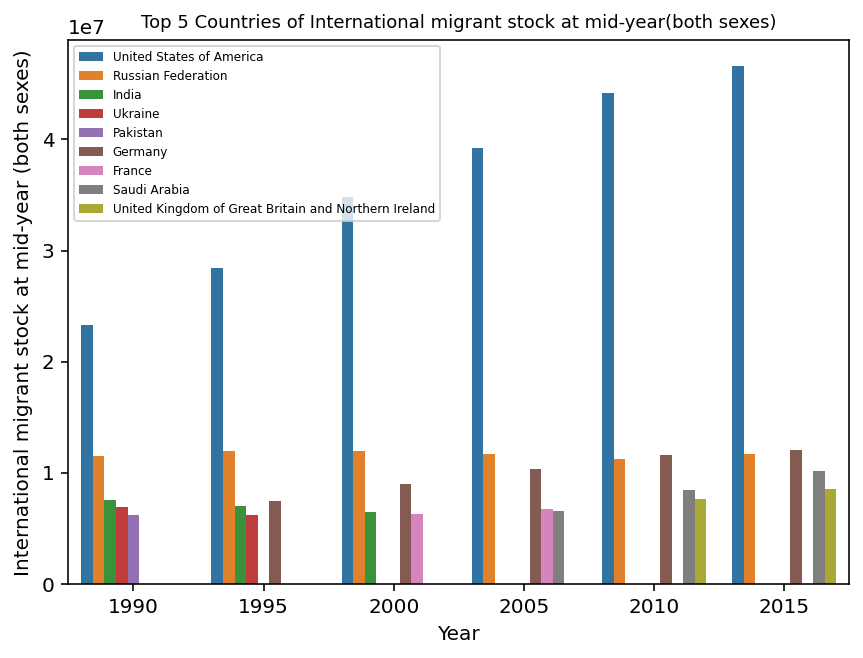

In [102]:
table1_c_b=top_country_b(table1_country_bothSexes,"International migrant stock at mid-year (both sexes)",x,country,"Top 5 Countries of International migrant stock at mid-year(both sexes)")

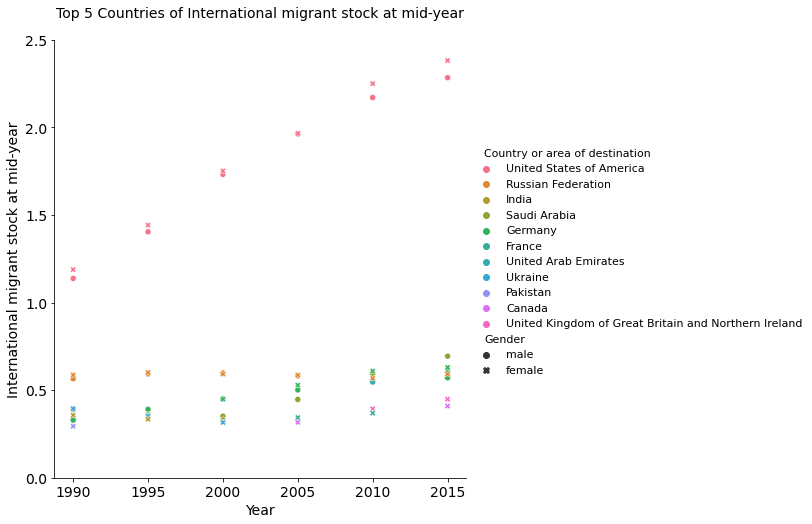

In [103]:
table1_g=top_country_g(table1_country_gender,"International migrant stock at mid-year",x,country,style,"Top 5 Countries of International migrant stock at mid-year\n")

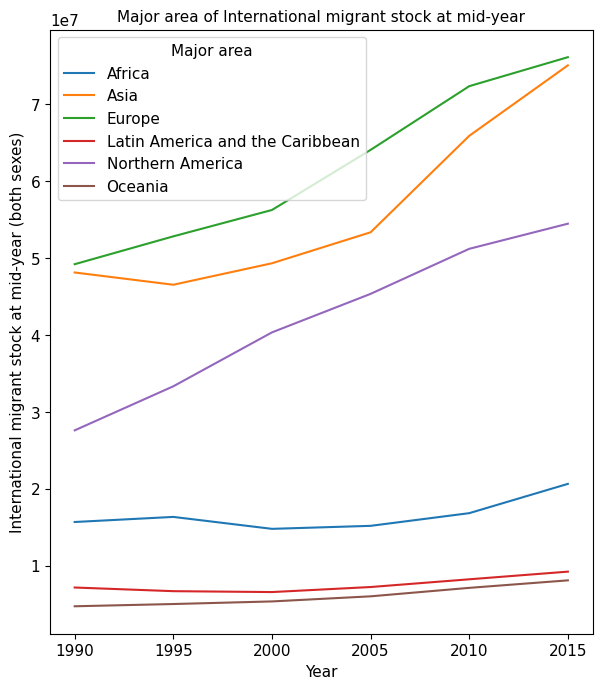

In [104]:
graph_lineplot_o(table1_major_bothSexes,x,"International migrant stock at mid-year (both sexes)",major,"Major area of International migrant stock at mid-year")

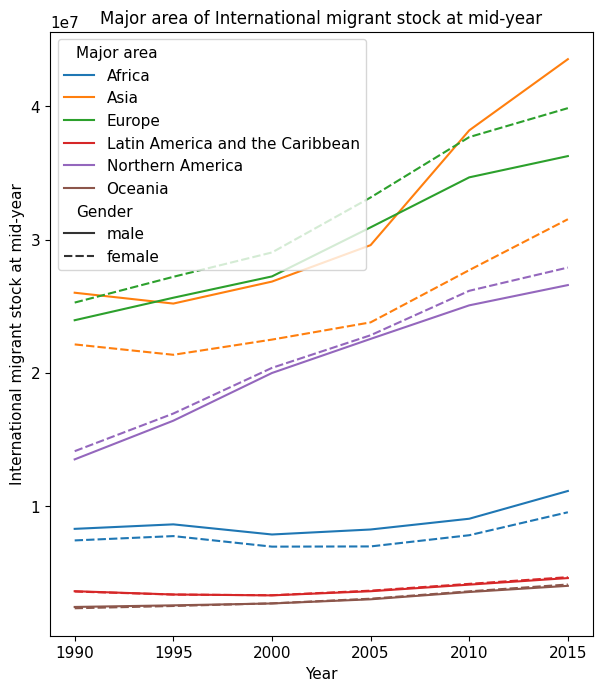

In [105]:
graph_lineplot_m(table1_major_gender,x,"International migrant stock at mid-year",major,"Gender","Major area of International migrant stock at mid-year")

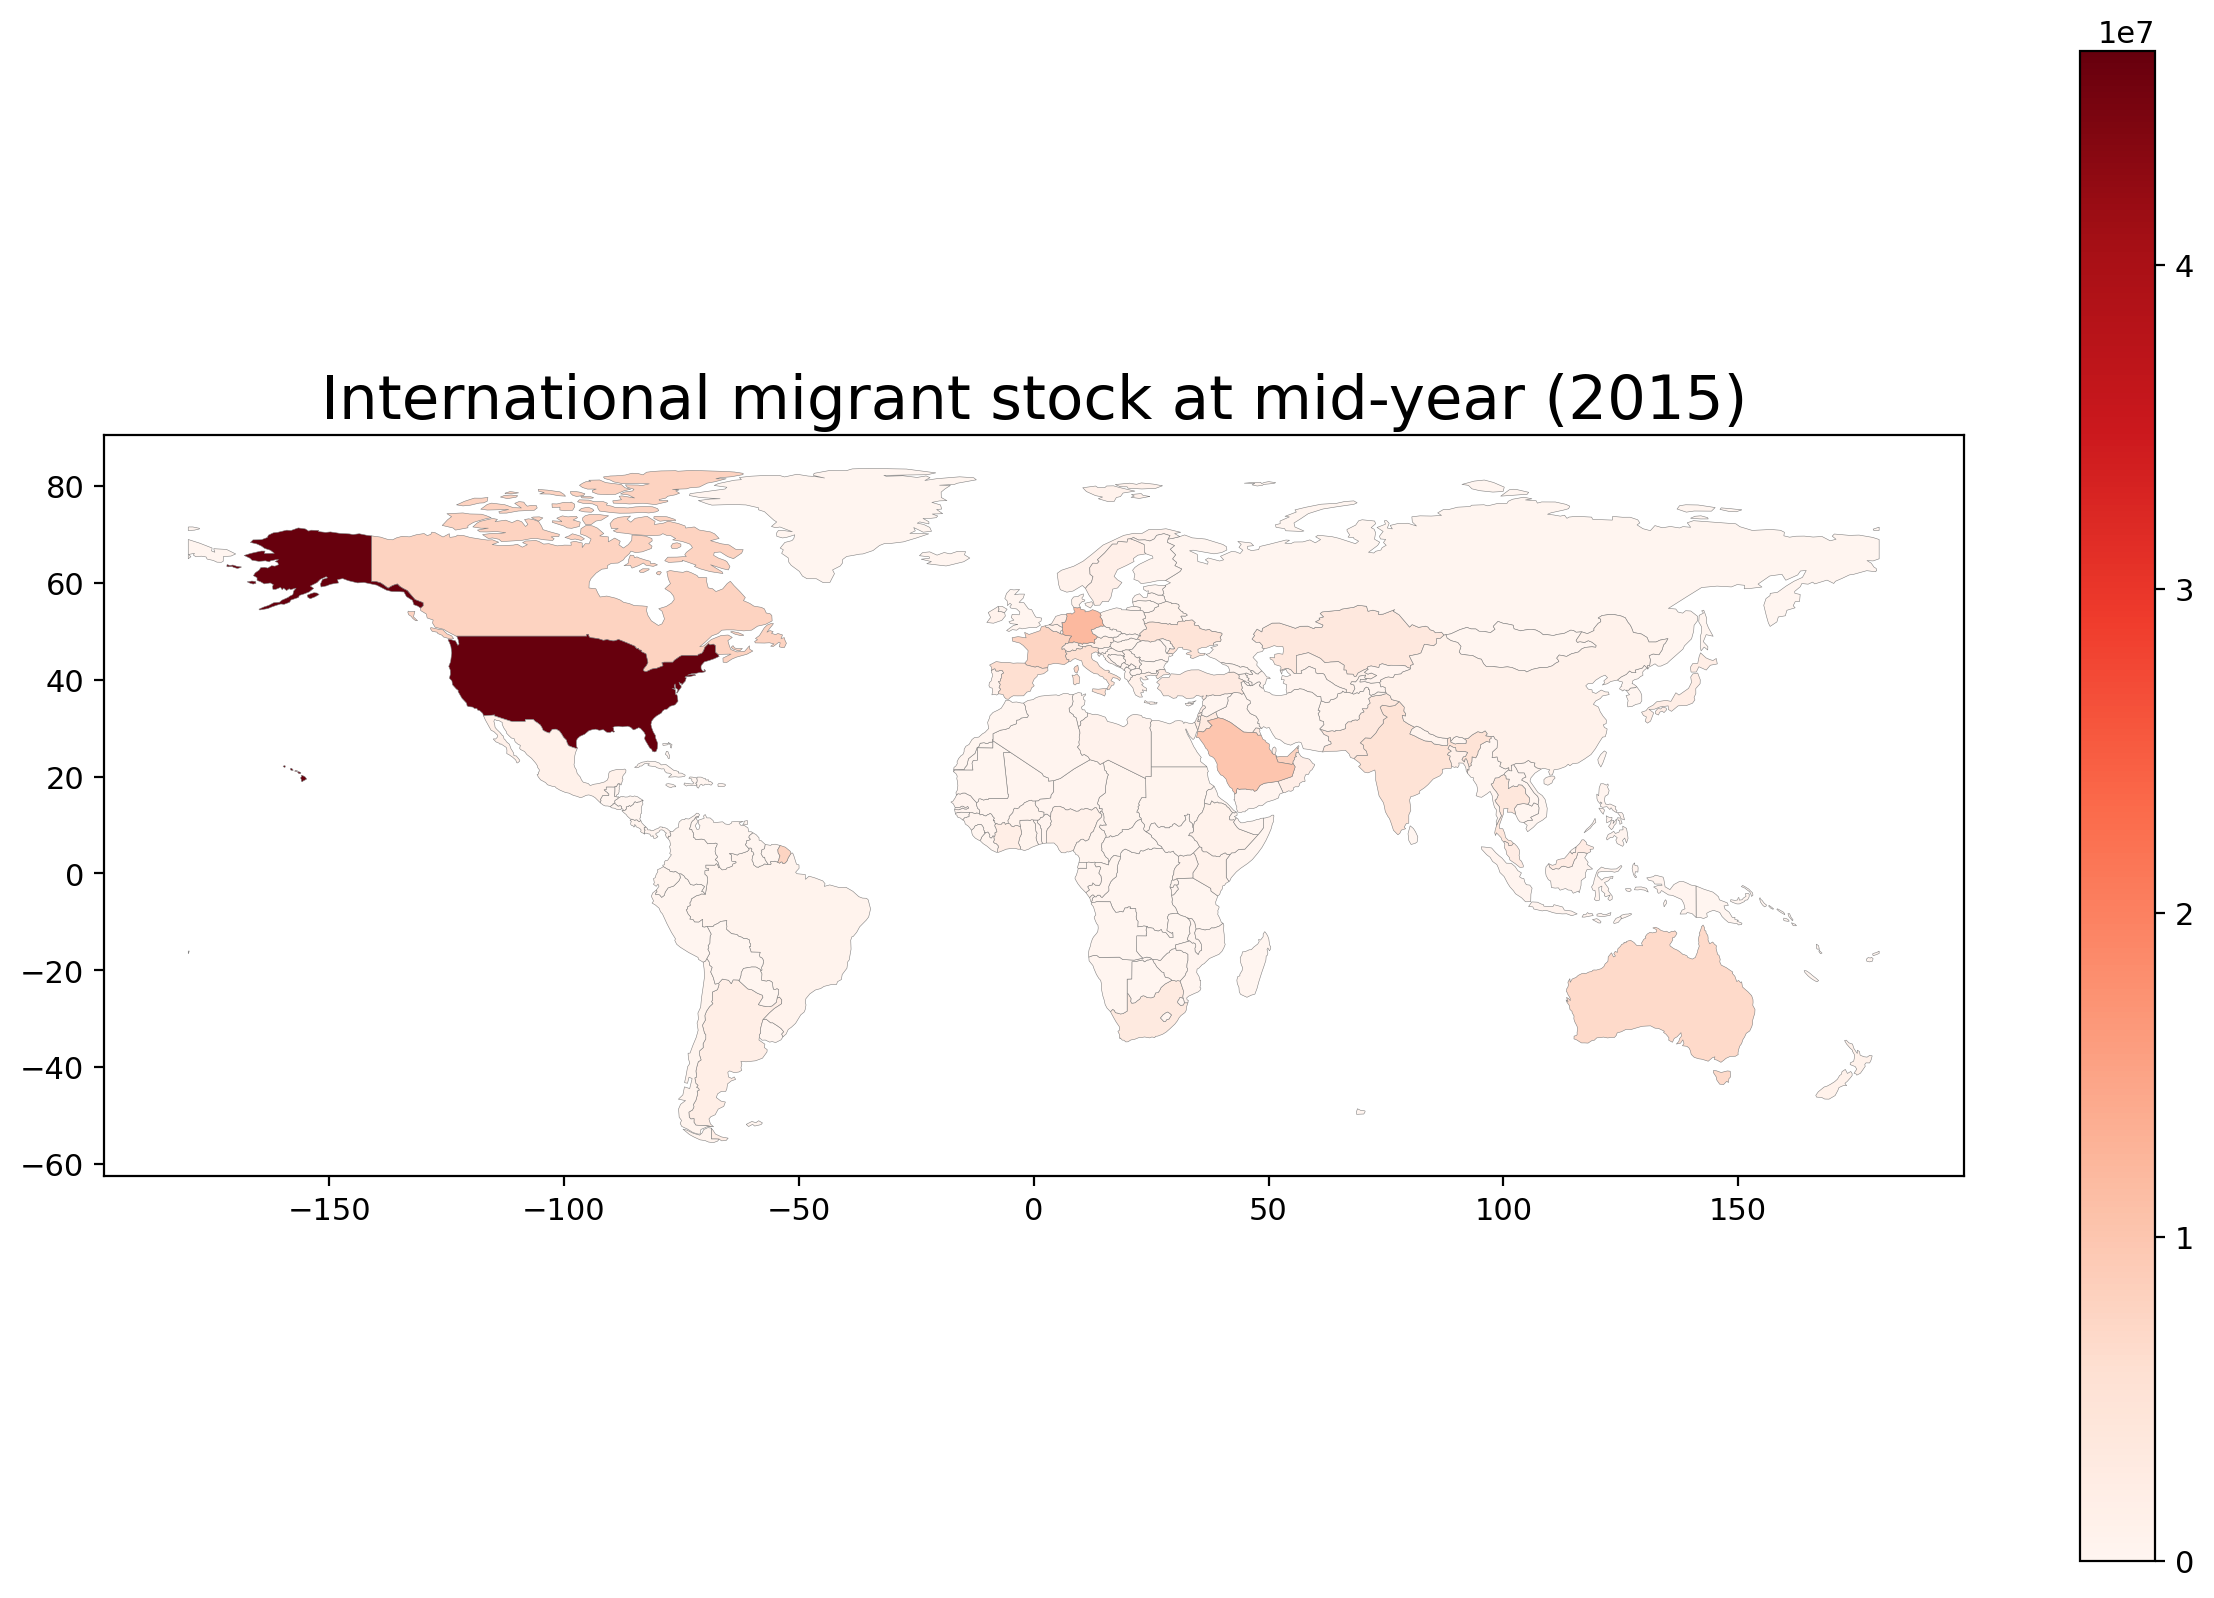

In [106]:
word_graph(table1_country_bothSexes,"International migrant stock at mid-year (both sexes)","International migrant stock at mid-year (2015)")

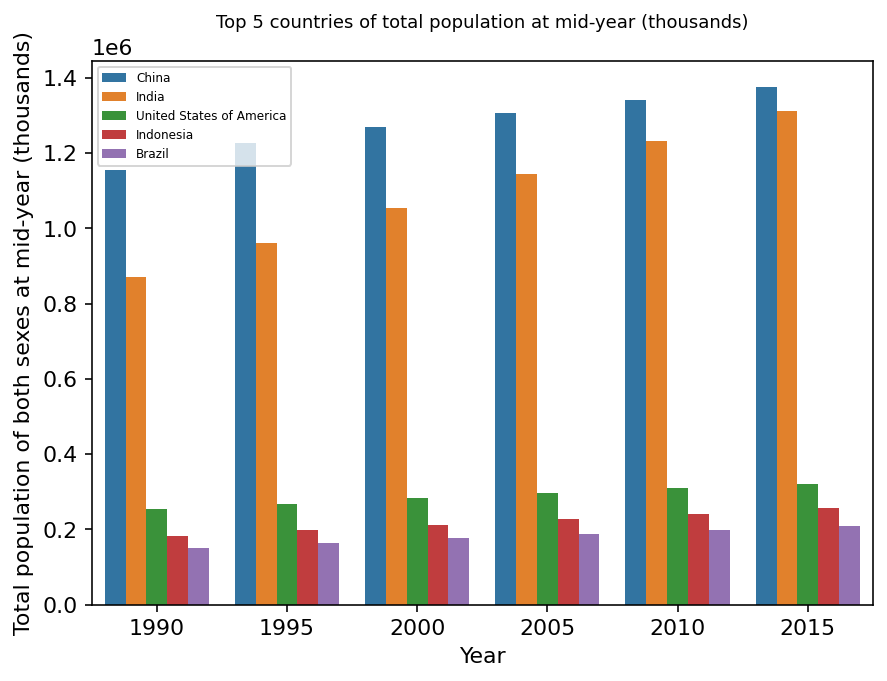

In [107]:
table2_c_b=top_country_b(table2_country_bothSexes,"Total population of both sexes at mid-year (thousands)",x,country,"Top 5 countries of total population at mid-year (thousands)\n")

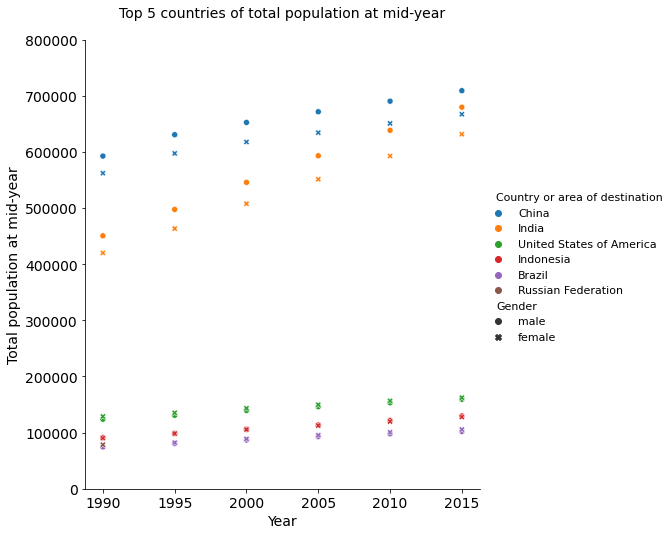

In [108]:
table2_g=top_country_g(table2_country_gender,"Total population at mid-year",x,country,style,"Top 5 countries of total population at mid-year\n")

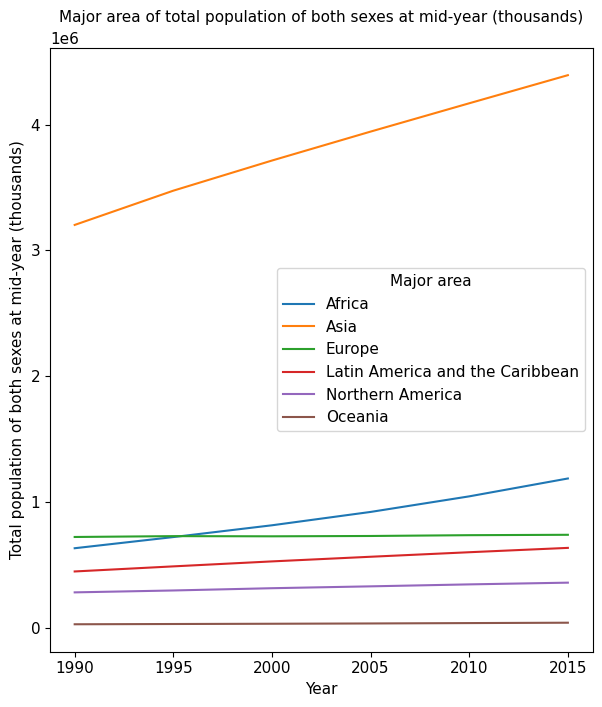

In [109]:
graph_lineplot_o(table2_major_bothSexes,x,"Total population of both sexes at mid-year (thousands)",major,"Major area of total population of both sexes at mid-year (thousands)\n")

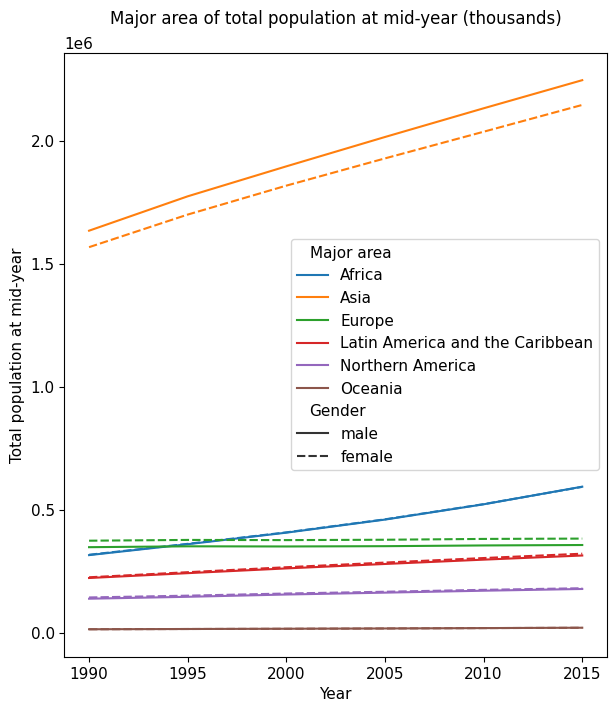

In [110]:
graph_lineplot_m(table2_major_gender,x,"Total population at mid-year",major,"Gender","Major area of total population at mid-year (thousands)\n")

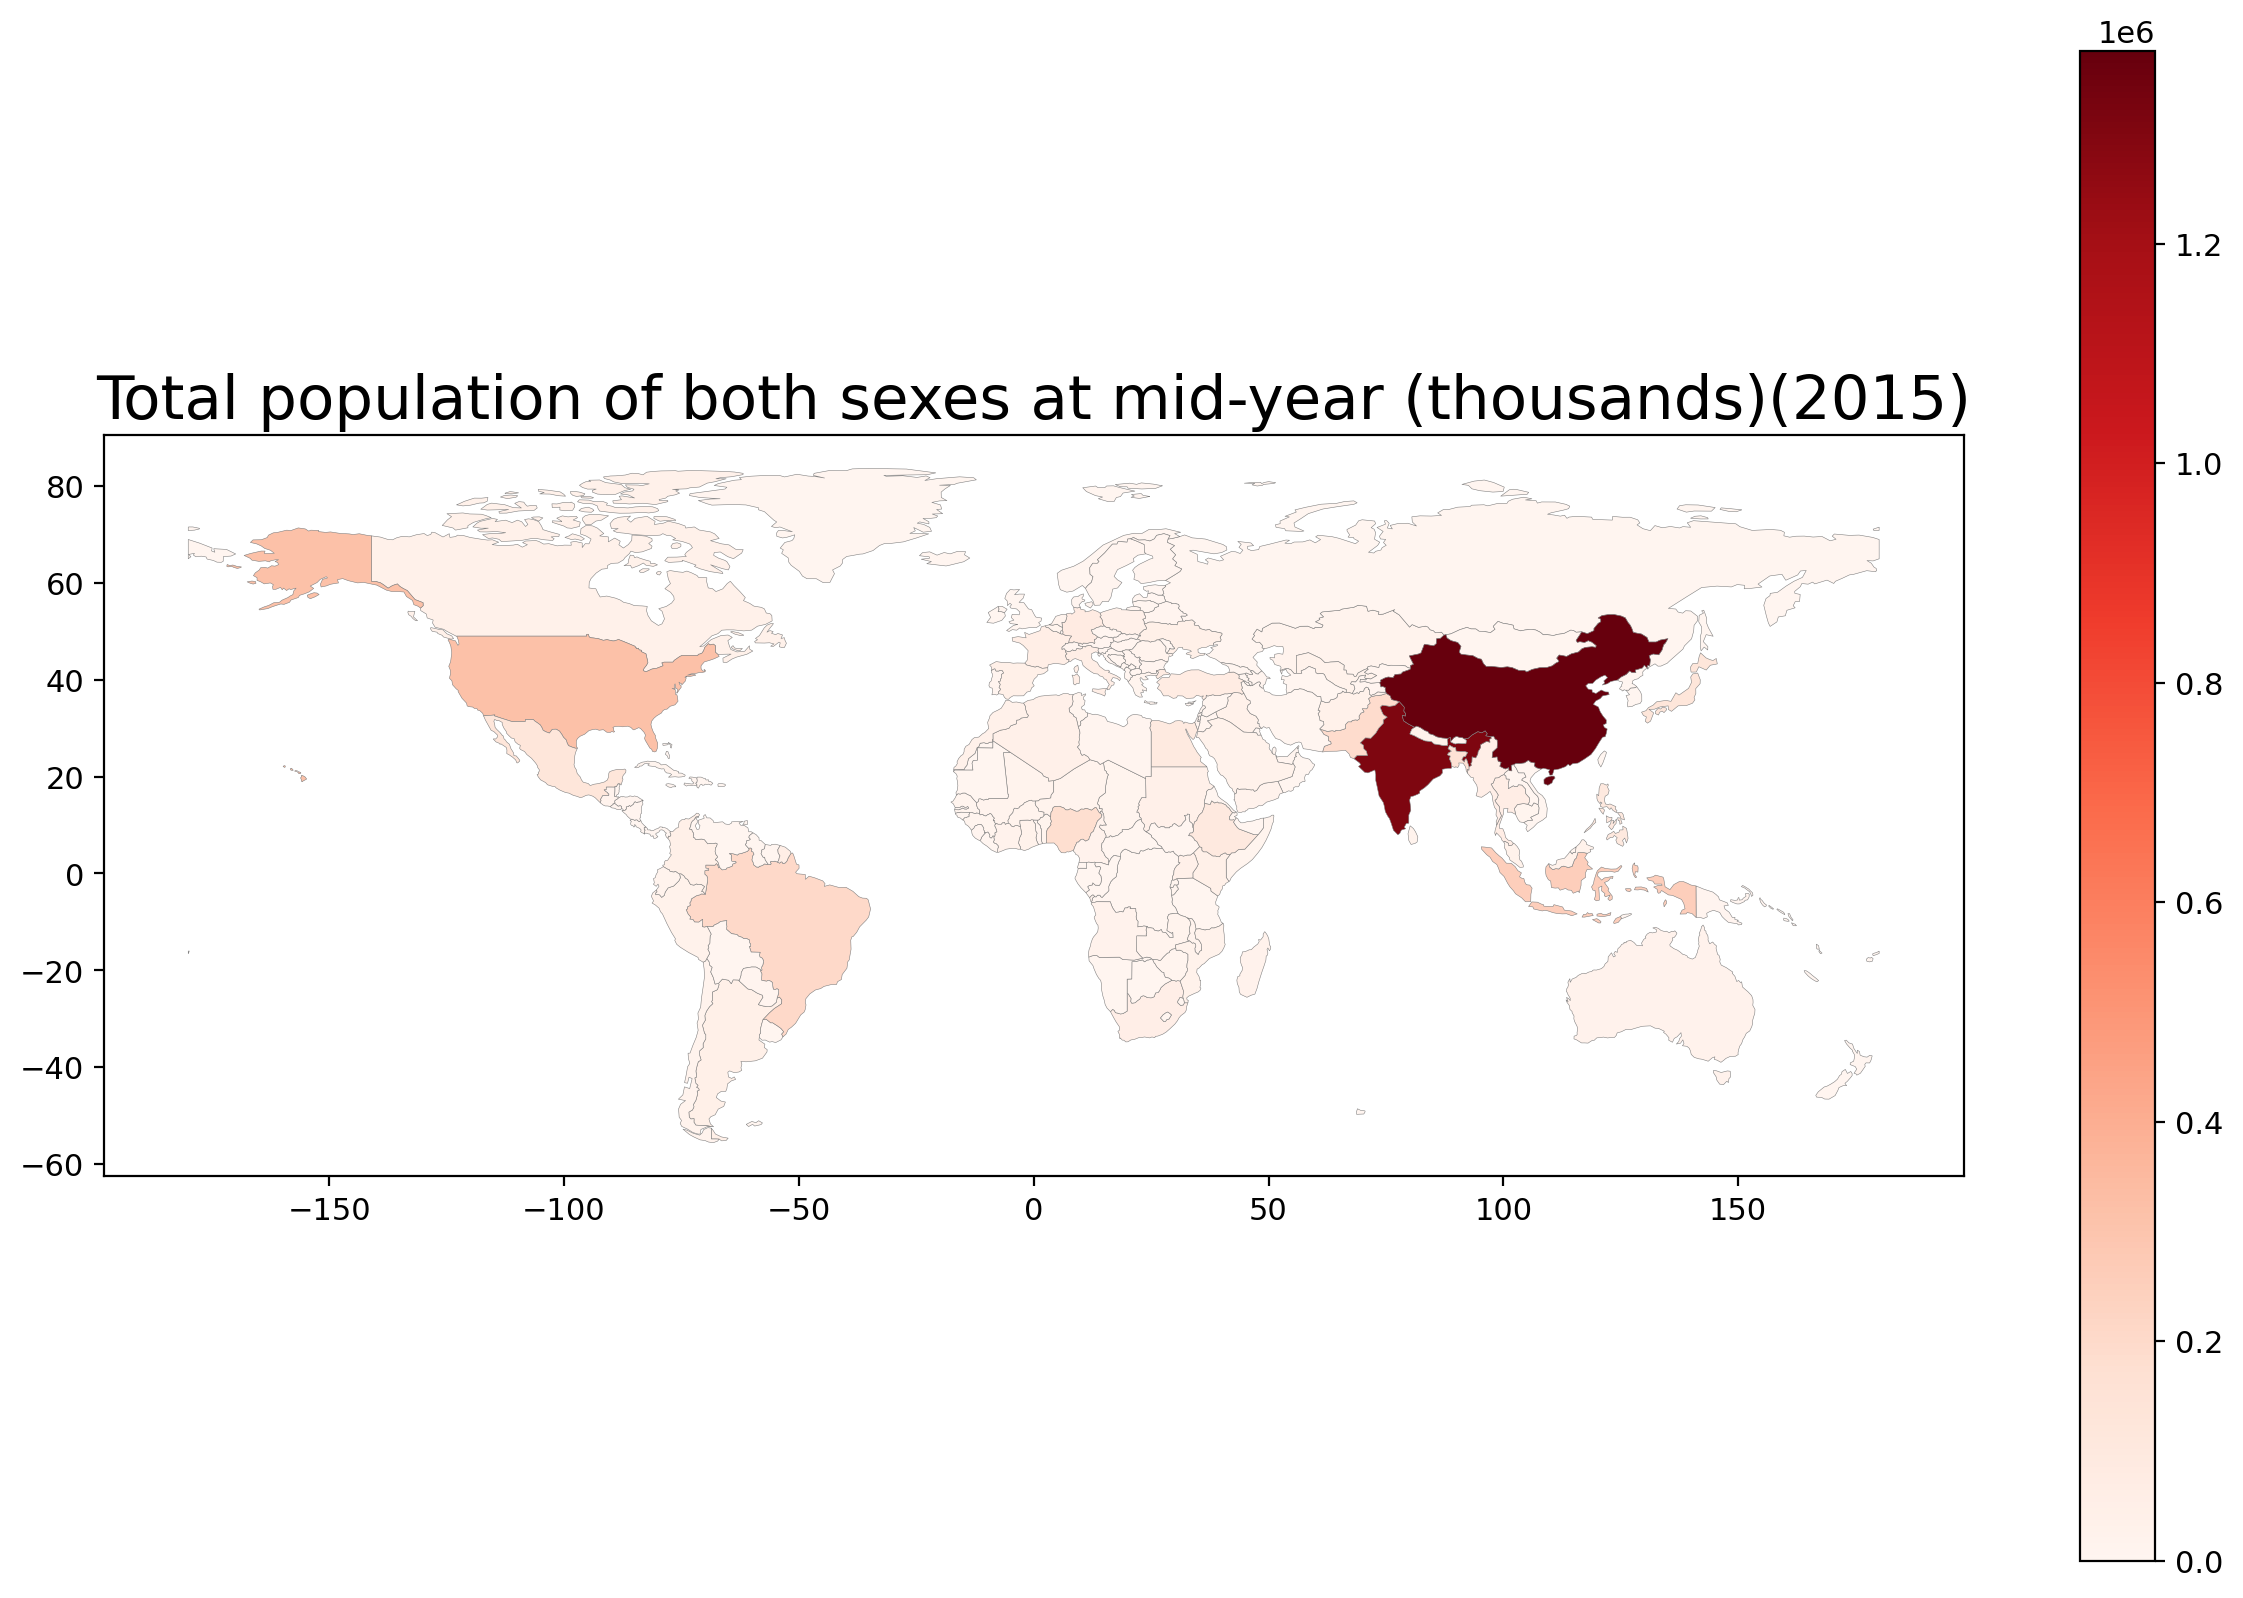

In [111]:
word_graph(table2_country_bothSexes,"Total population of both sexes at mid-year (thousands)","Total population of both sexes at mid-year (thousands)(2015)")

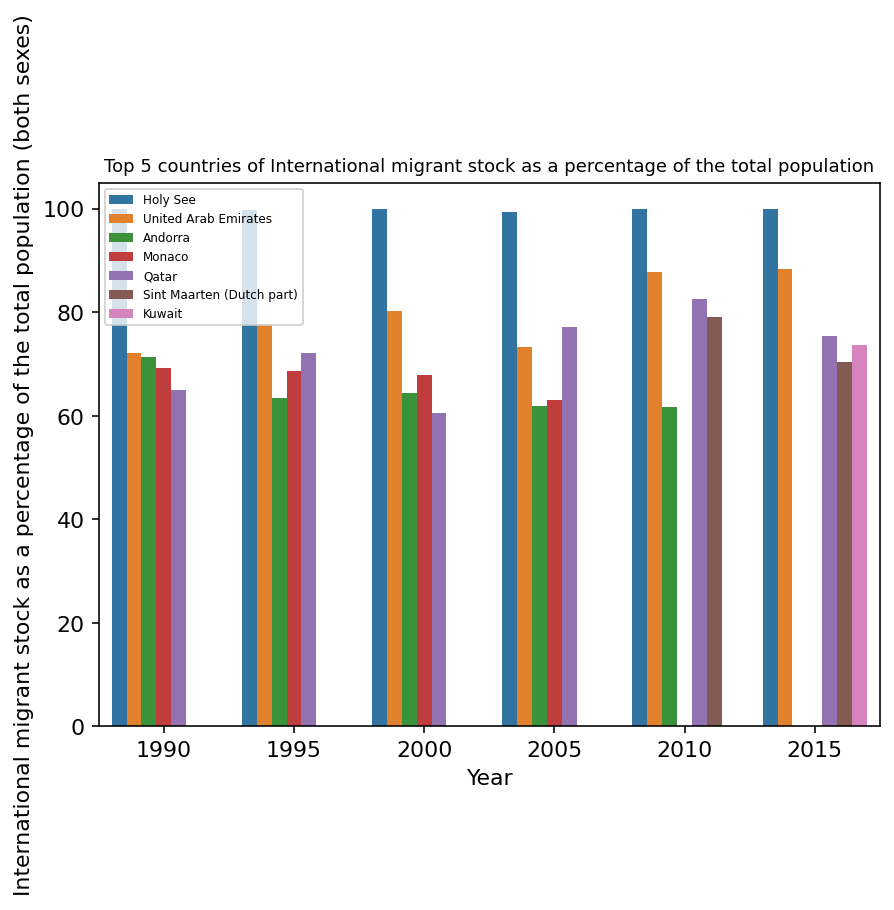

In [112]:
table3_c_b=top_country_b(table3_country_bothSexes,"International migrant stock as a percentage of the total population (both sexes)",x,country,"Top 5 countries of International migrant stock as a percentage of the total population")

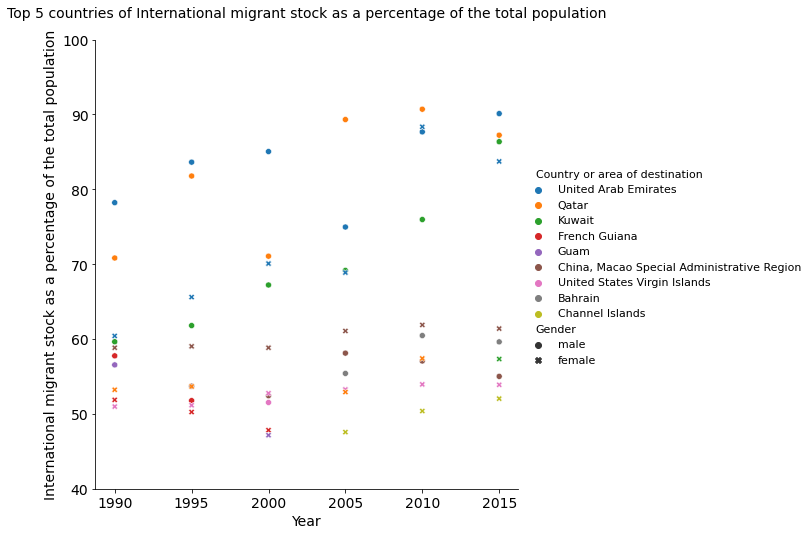

In [113]:
table3_g=top_country_g(table3_country_gender,"International migrant stock as a percentage of the total population",x,country,style,"Top 5 countries of International migrant stock as a percentage of the total population\n")

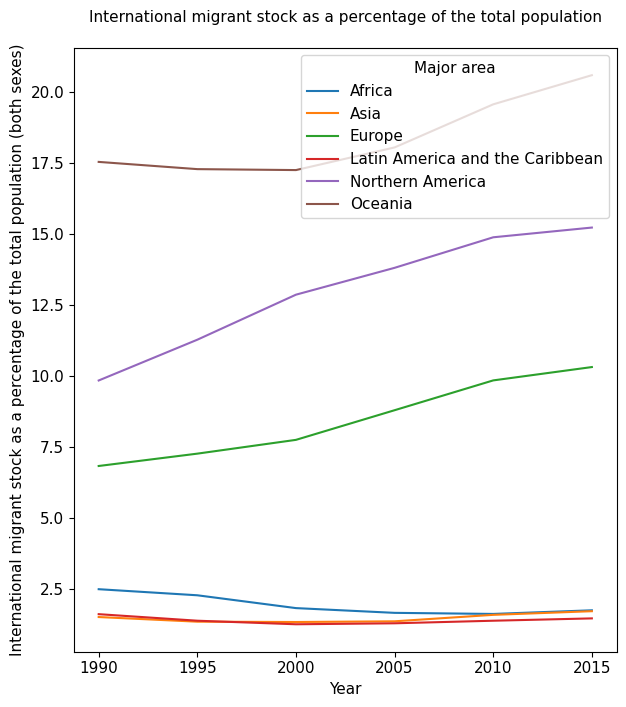

In [114]:
graph_lineplot_o(table3_major_bothSexes,x,"International migrant stock as a percentage of the total population (both sexes)",major,"International migrant stock as a percentage of the total population\n")

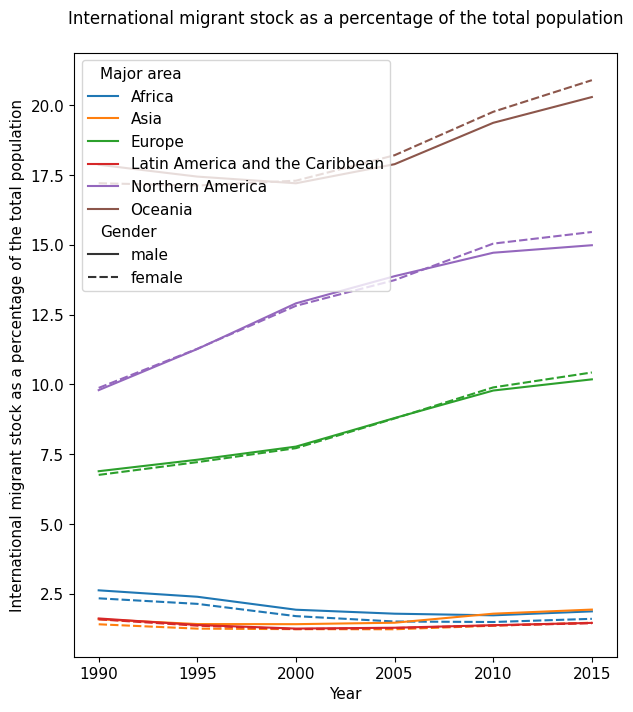

In [115]:
graph_lineplot_m(table3_major_gender,x,"International migrant stock as a percentage of the total population",major,"Gender","International migrant stock as a percentage of the total population\n")

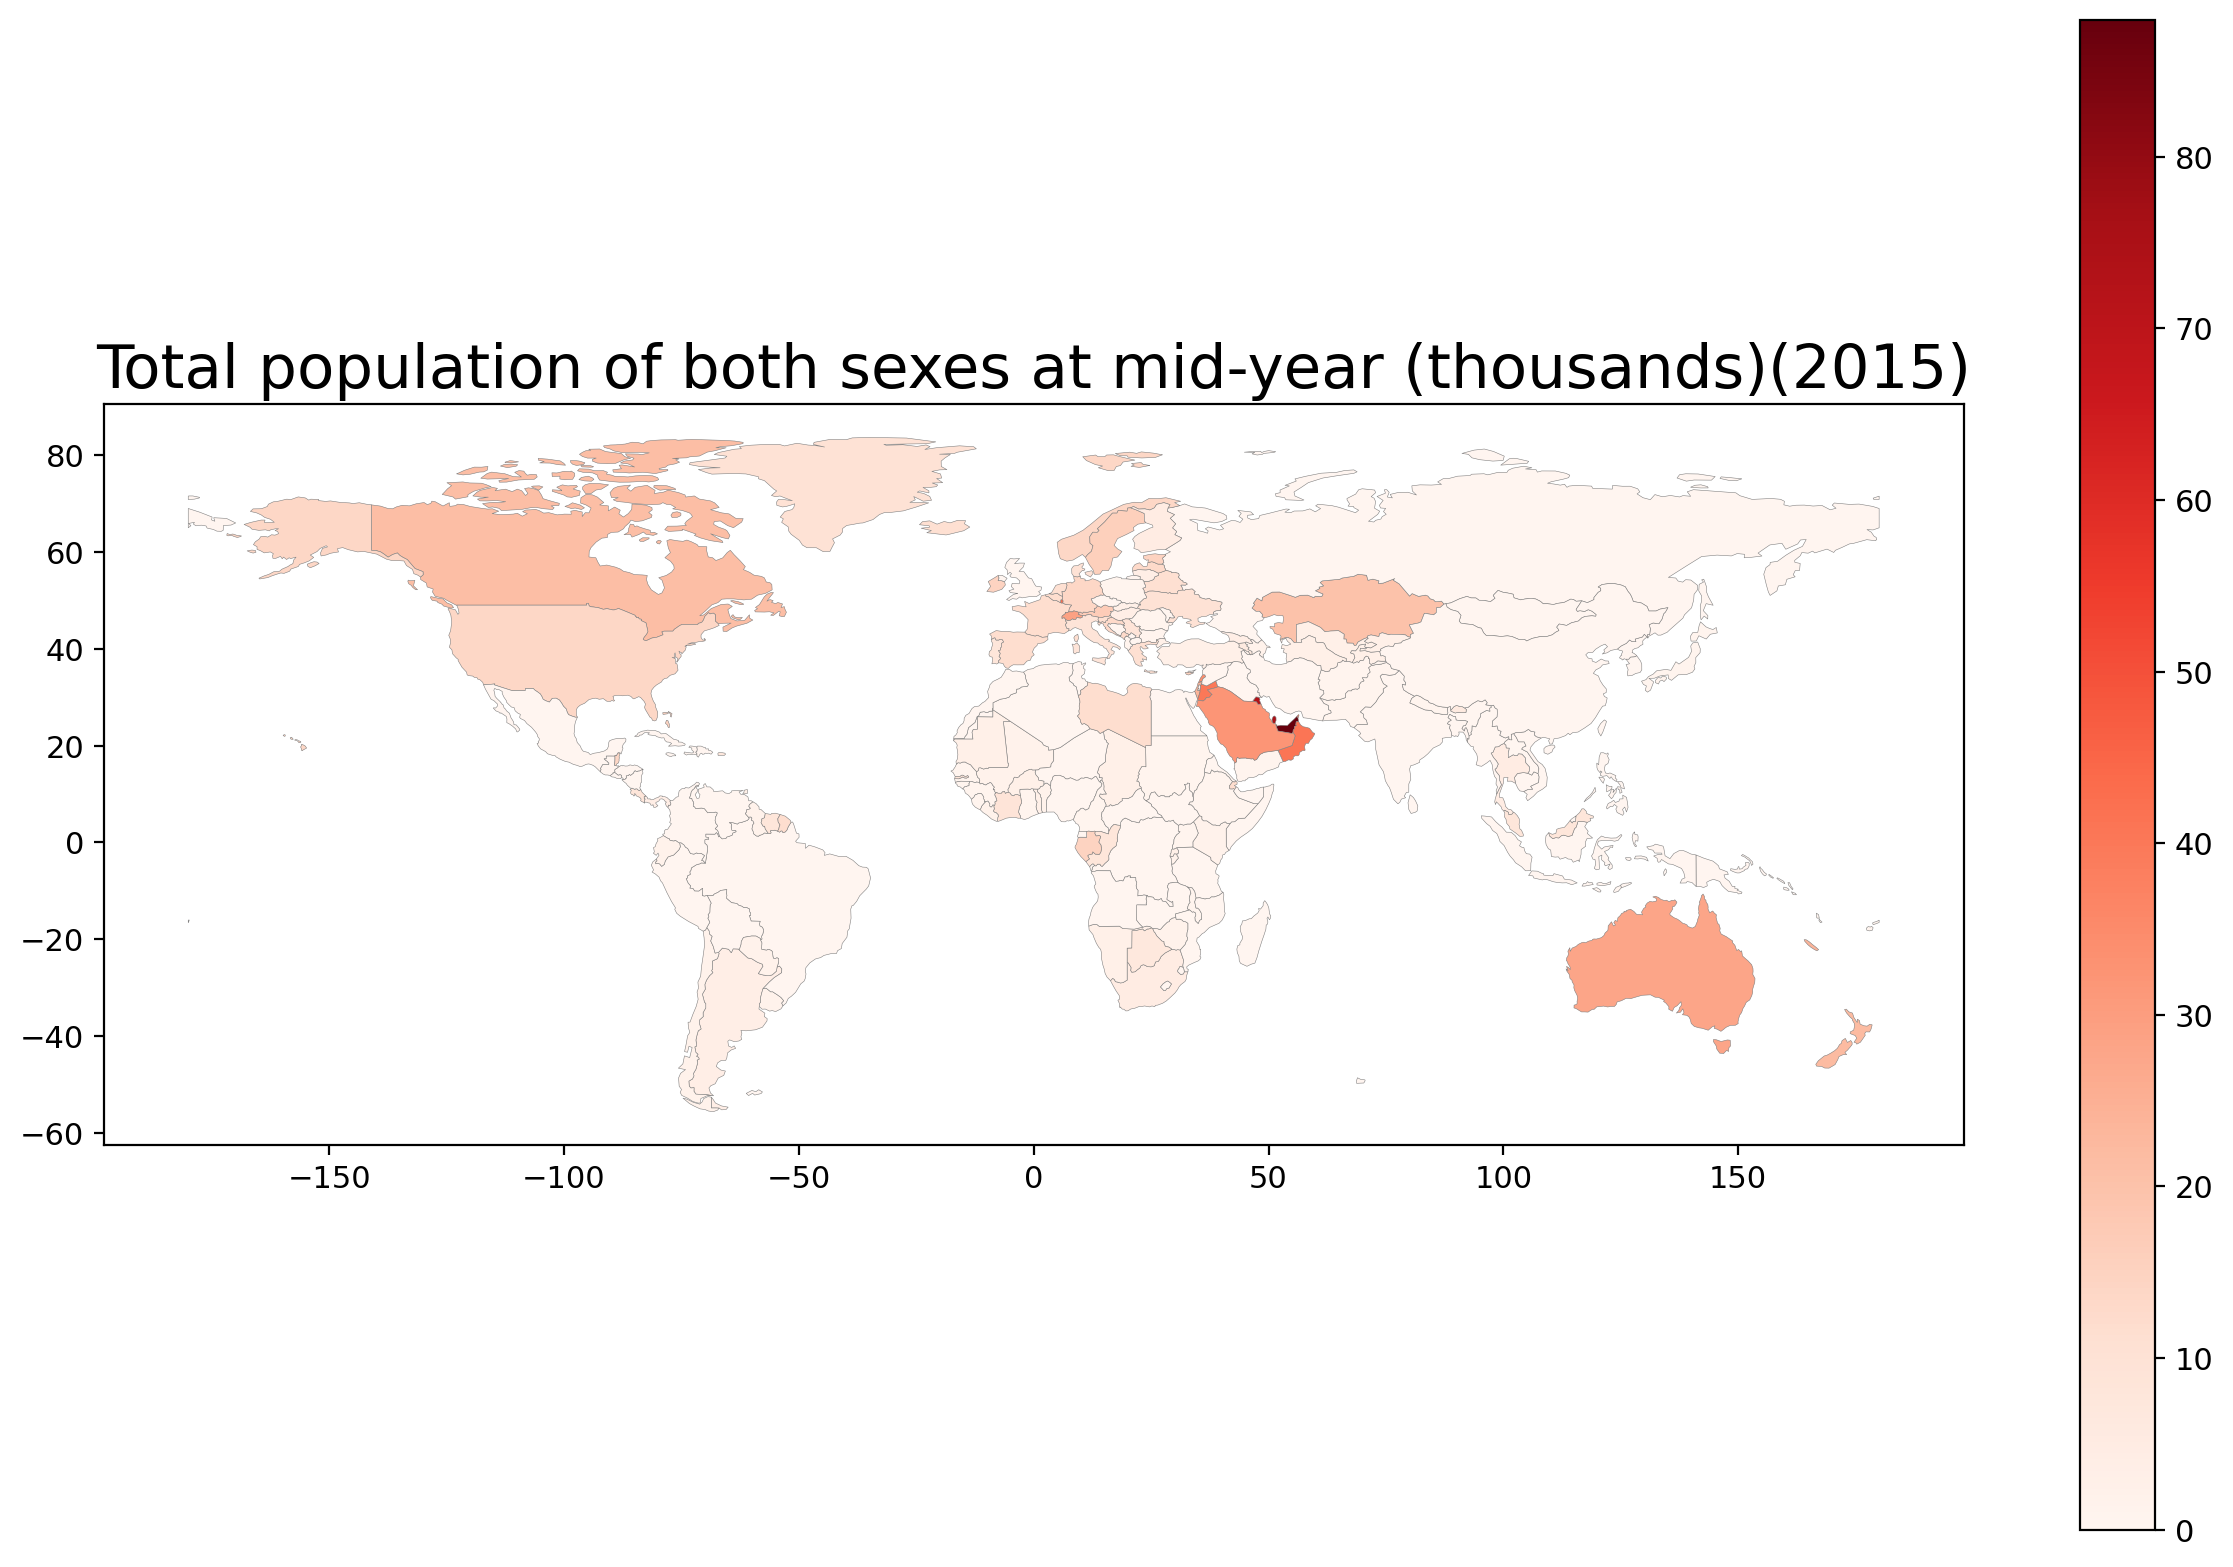

In [116]:
word_graph(table3_country_bothSexes,"International migrant stock as a percentage of the total population (both sexes)","Total population of both sexes at mid-year (thousands)(2015)")

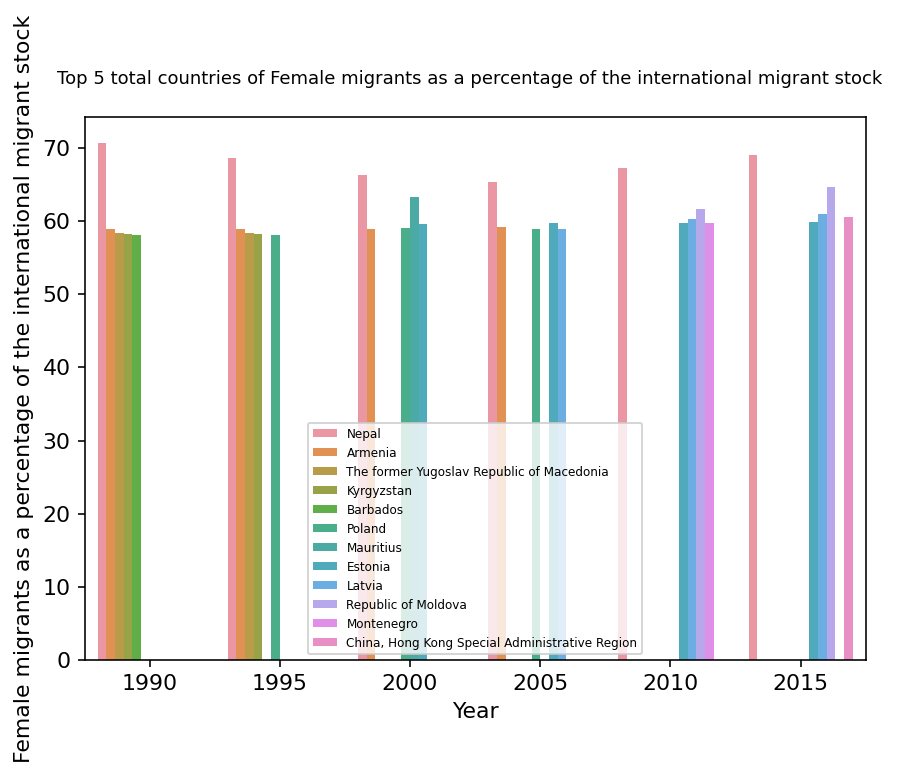

In [117]:
table4_c_b=top_country_b(table4_country,"Female migrants as a percentage of the international migrant stock",x,country,"Top 5 total countries of Female migrants as a percentage of the international migrant stock  \n")

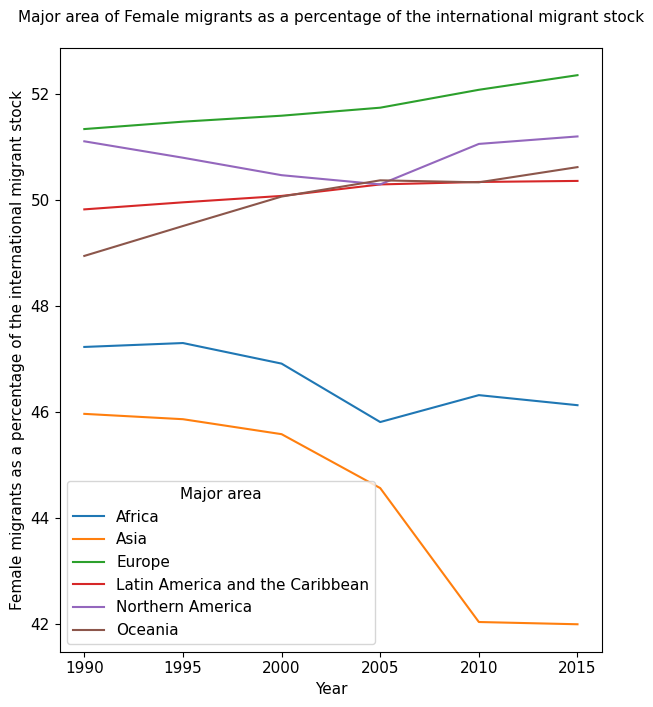

In [118]:
graph_lineplot_o(table4_major,x,"Female migrants as a percentage of the international migrant stock",major,"Major area of Female migrants as a percentage of the international migrant stock\n")

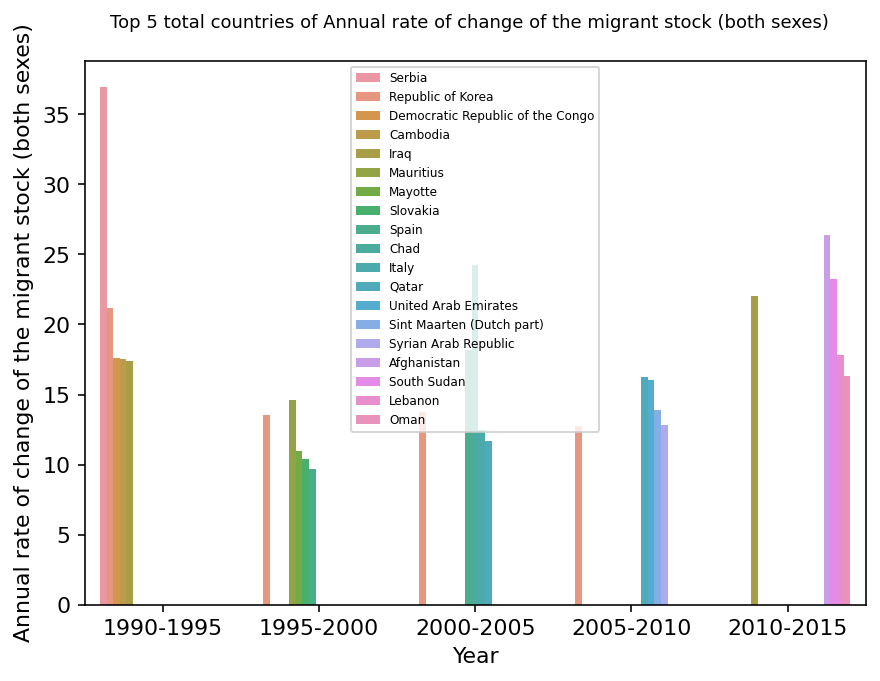

In [119]:
table5_c_b=top_country_b5(table5_country_bothSexes,"Annual rate of change of the migrant stock (both sexes)",x,country,"Top 5 total countries of Annual rate of change of the migrant stock (both sexes)  \n")

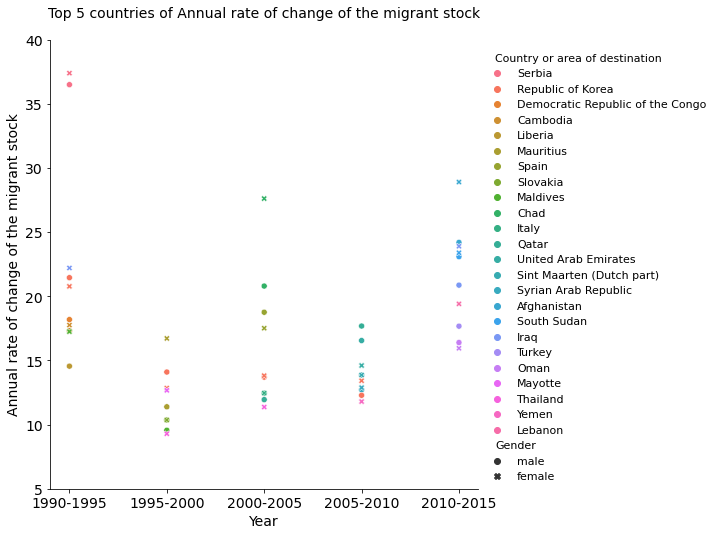

In [120]:
table5_g=top_country_g5(table5_country_gender,"Annual rate of change of the migrant stock",x,country,style,"Top 5 countries of Annual rate of change of the migrant stock\n")

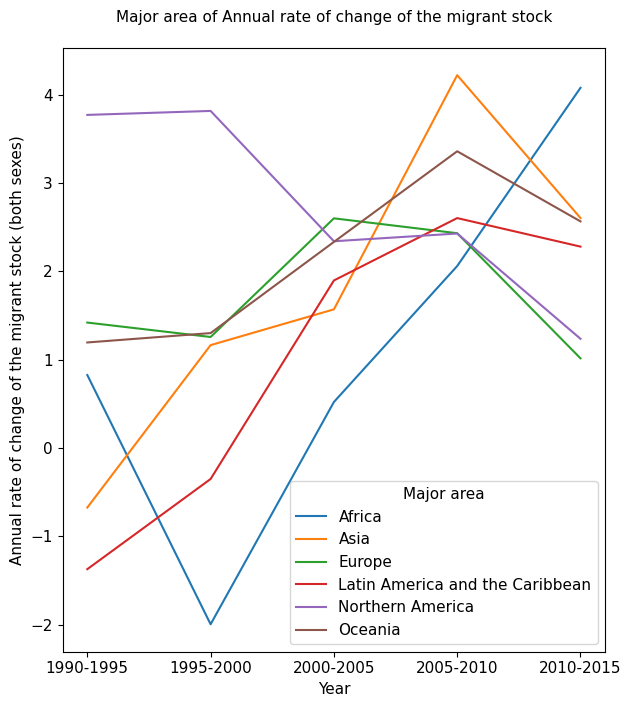

In [121]:
graph_lineplot_o(table5_major_bothSexes,x,"Annual rate of change of the migrant stock (both sexes)",major,"Major area of Annual rate of change of the migrant stock\n")

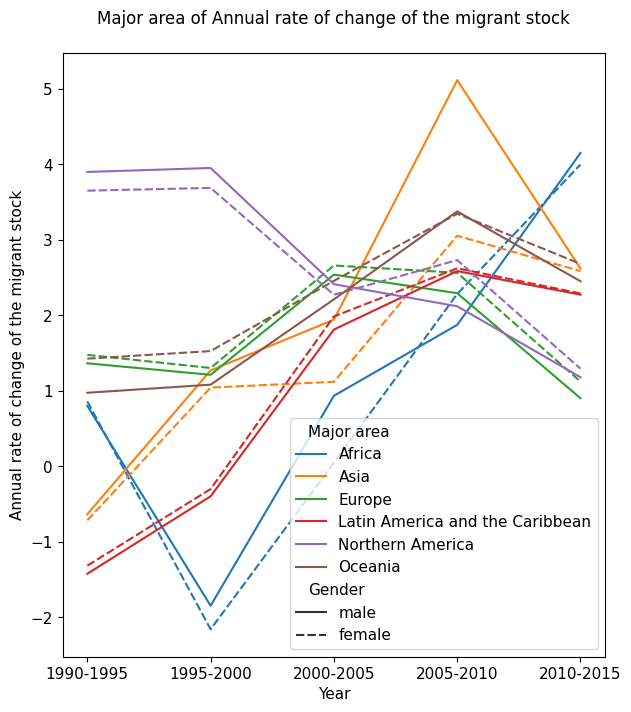

In [122]:
graph_lineplot_m(table5_major_gender,x,"Annual rate of change of the migrant stock",major,"Gender","Major area of Annual rate of change of the migrant stock\n")

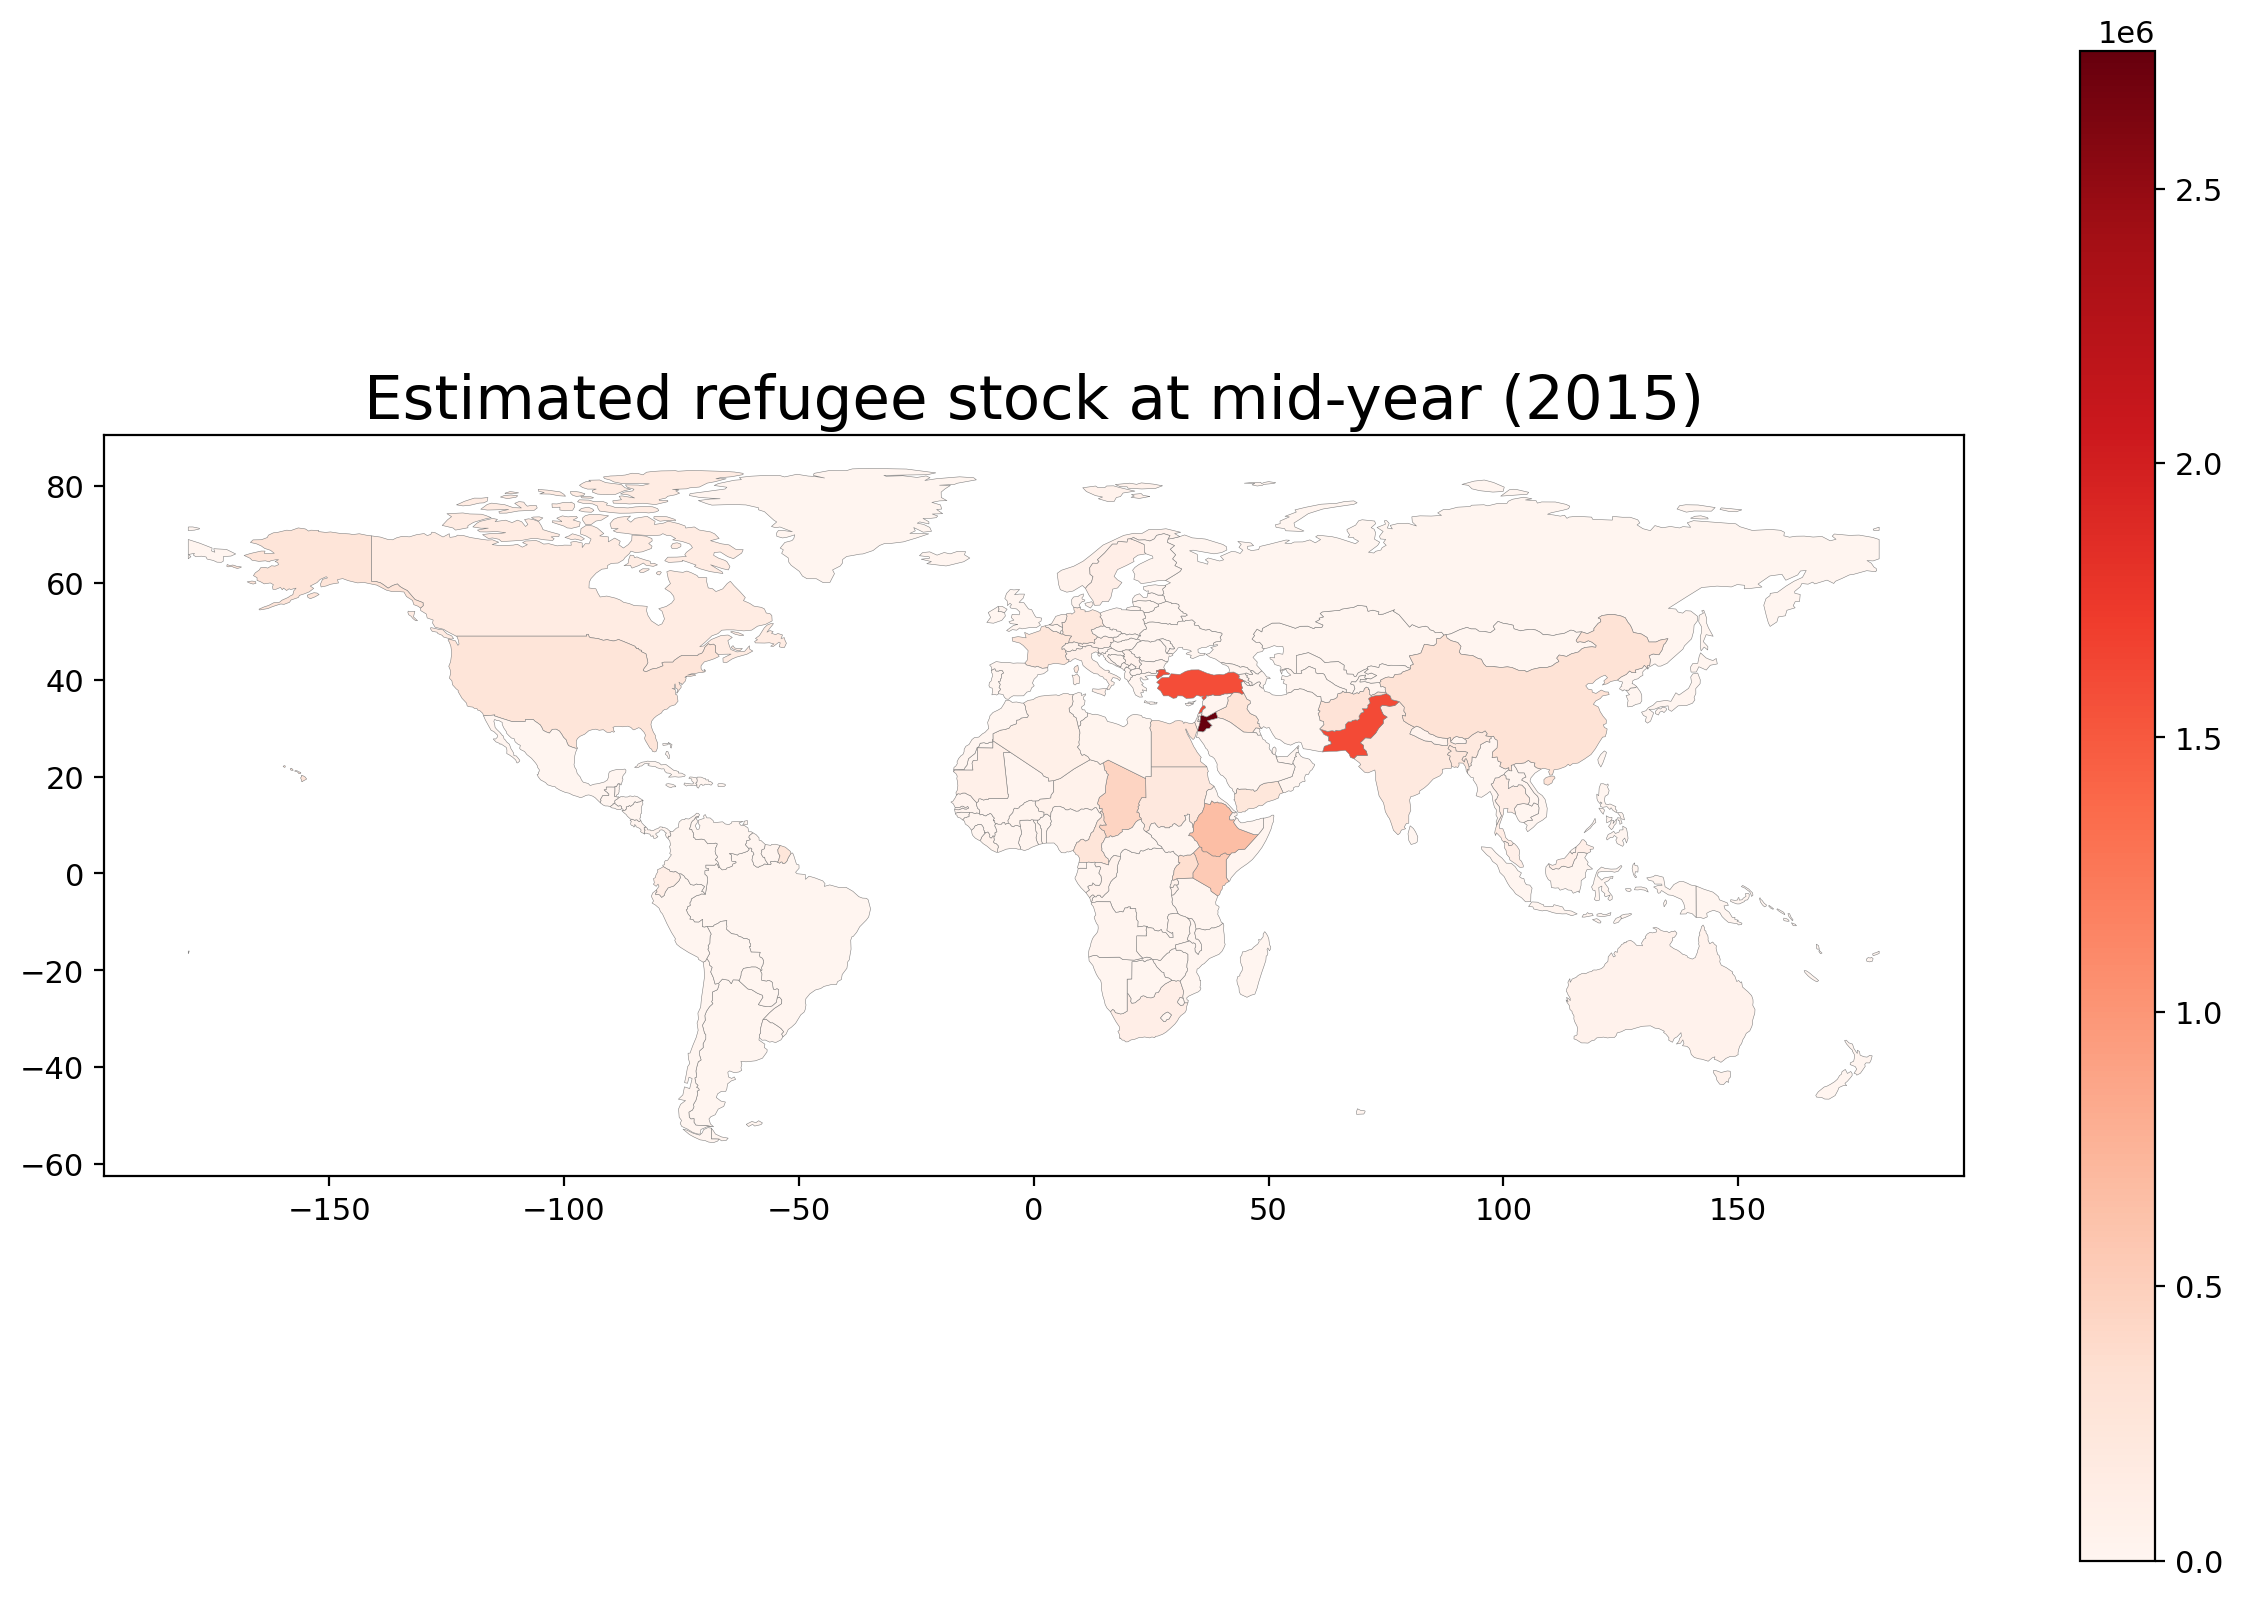

In [123]:
word_graph(table6_country_est_ref,"Estimated refugee stock at mid-year (both sexes)","Estimated refugee stock at mid-year (2015)")

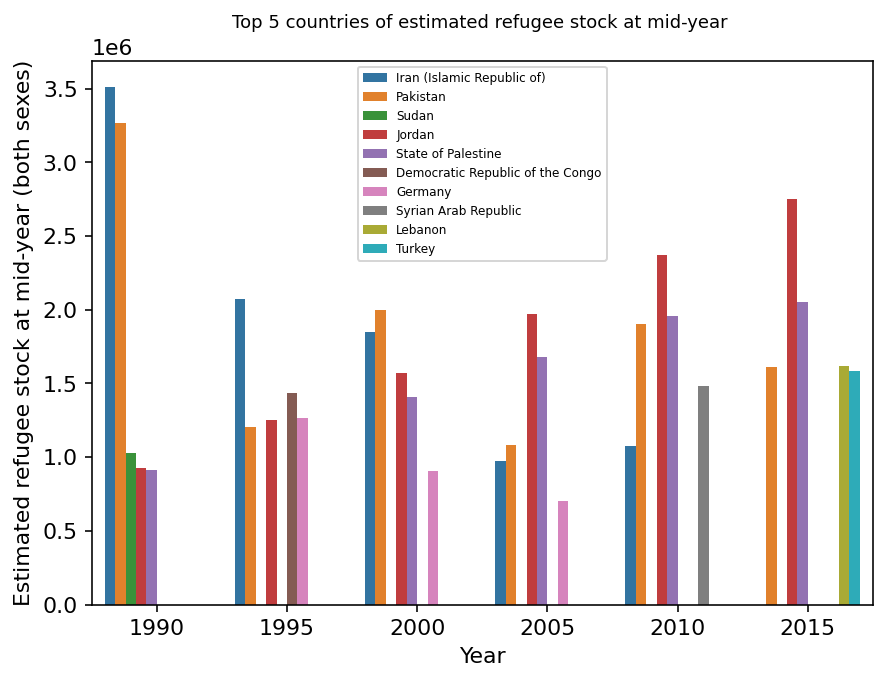

In [124]:
table6_c_b=top_country_b(table6_country_est_ref,"Estimated refugee stock at mid-year (both sexes)",x,country,"Top 5 countries of estimated refugee stock at mid-year \n")

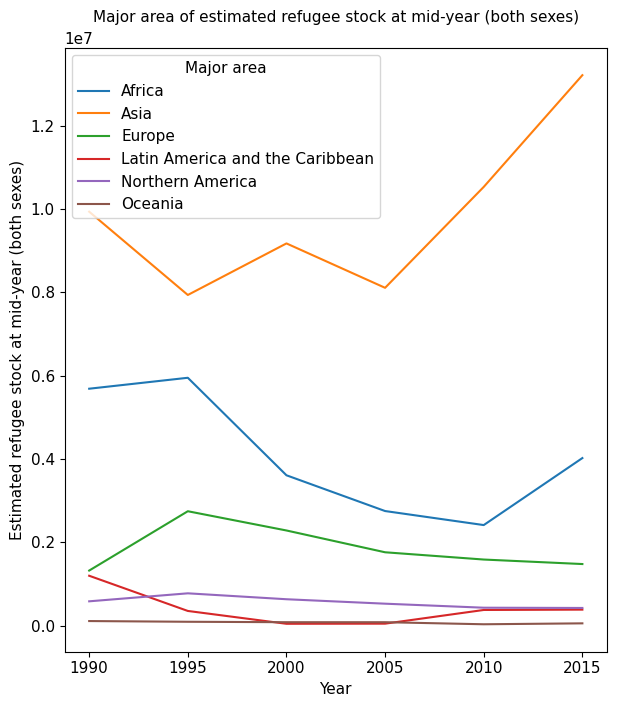

In [125]:
graph_lineplot_o(table6_major_est_ref,x,"Estimated refugee stock at mid-year (both sexes)",major,"Major area of estimated refugee stock at mid-year (both sexes)\n")

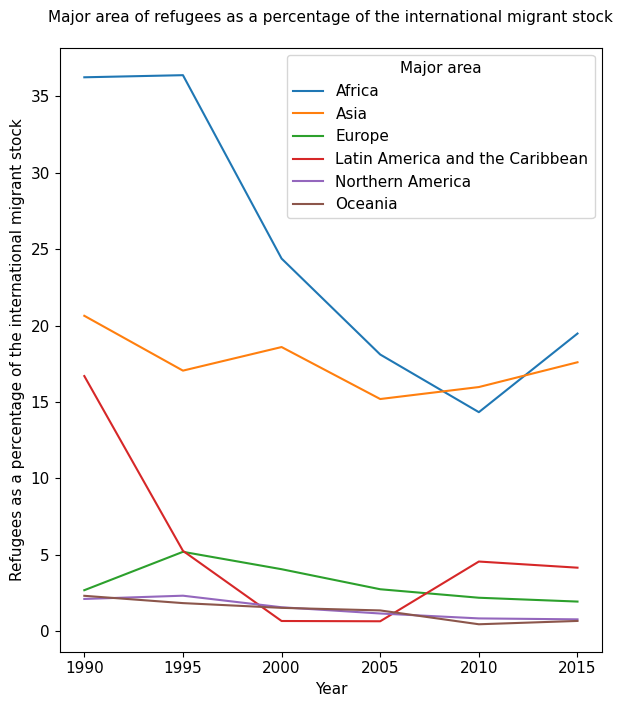

In [126]:
graph_lineplot_o(table6_major_Ref_inter,x,"Refugees as a percentage of the international migrant stock",major,"Major area of refugees as a percentage of the international migrant stock\n")

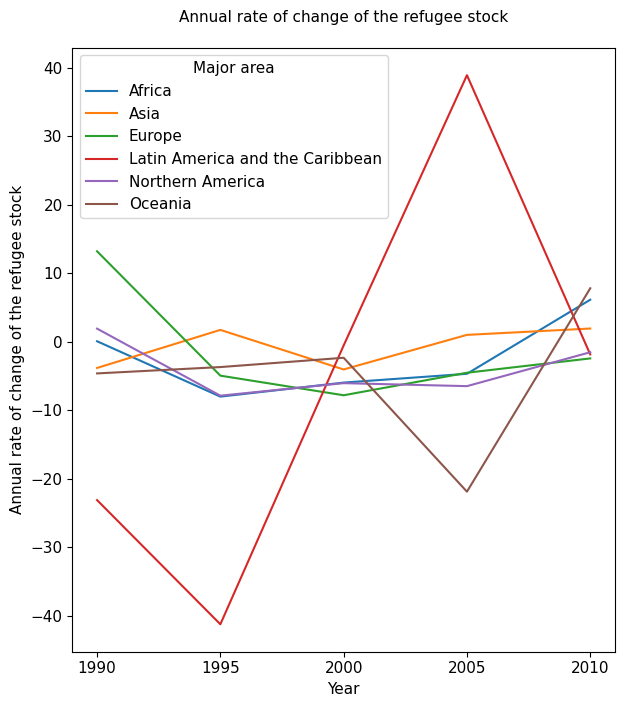

In [127]:
graph_lineplot_o(table6_major_ann_ref,x,"Annual rate of change of the refugee stock",major,"Annual rate of change of the refugee stock\n")

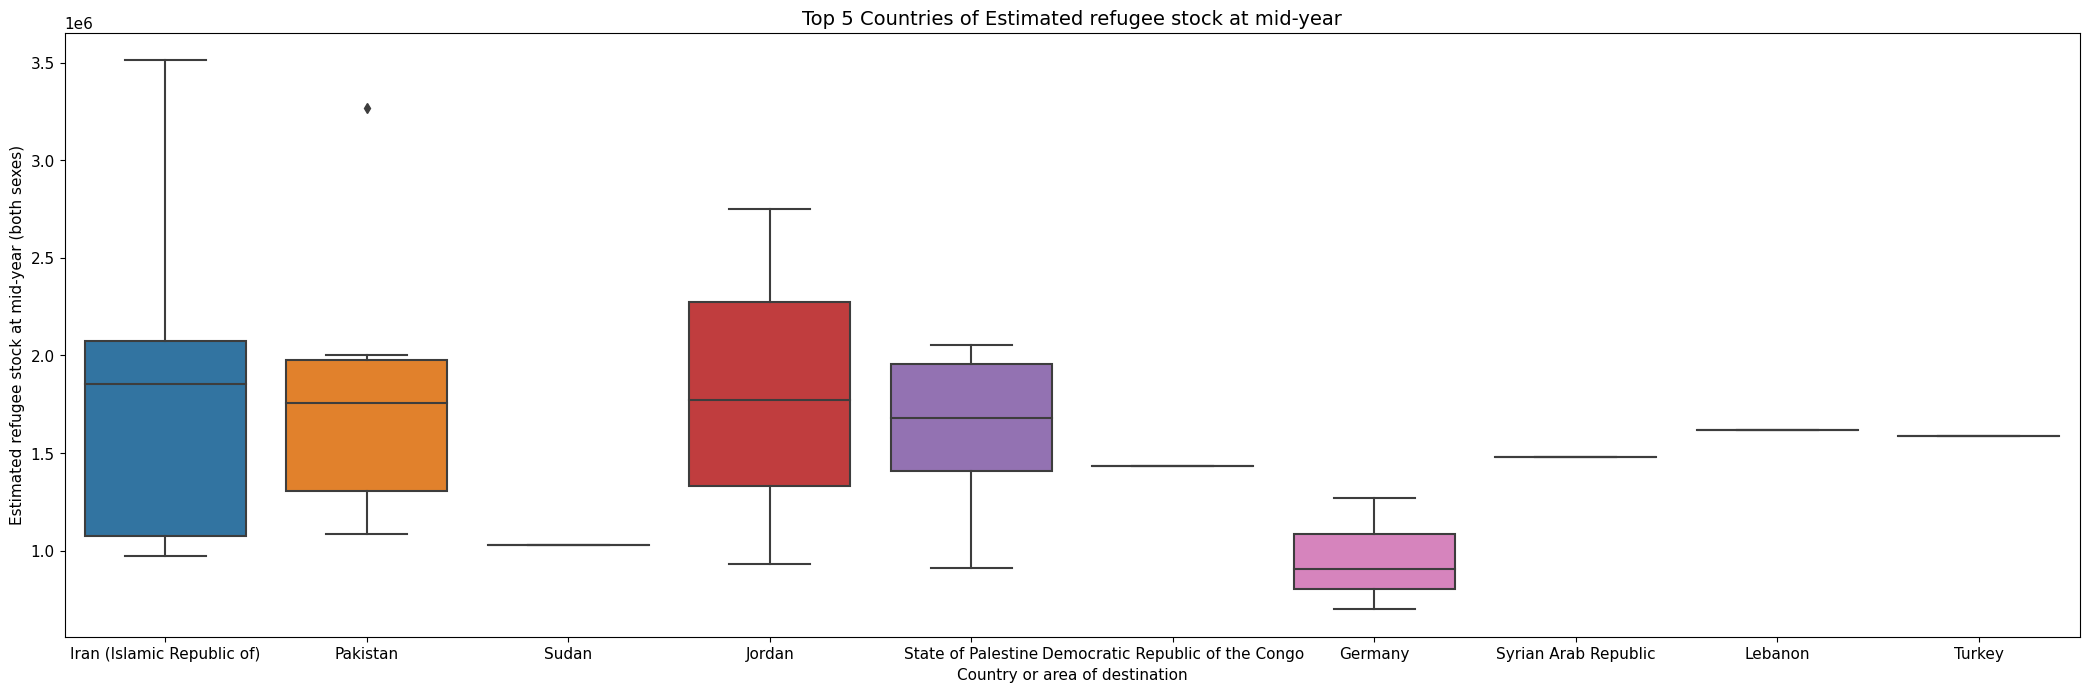

In [128]:
t6=graph_boxplot(table6_country_est_ref,"Estimated refugee stock at mid-year (both sexes)","Country or area of destination","Top 5 Countries of Estimated refugee stock at mid-year")